In [ ]:
"""
如果还没有配置manim环境
请先下载ffmpeg
其作用是可以让代码逐帧渲染成视频
然后使用pip工具，在vs code、pycharm或jupyter中安装manim
使用vs code时注意安装jupyter插件便于manim的直接渲染

在终端中运行:
↓  ↓  ↓
pip install manim
↑  ↑  ↑

!!!注意ffmpeg和manim的环境变量的配置

manim详细的教程可以翻阅文档
https://docs.manim.community/

关于本段代码详情可联系编写者：rainbow鱼
QQ:465936509
"""

In [ ]:
"""

如果发现缺少字体可以运行这段代码
在下方您拥有的字体中选择一个
填入text_font列表的第一位

↓  ↓  ↓
"""

from manim import Text
t = Text("",font="of course there's no font called this name")

In [1]:
from manim import *

# import copy  
# 注意对列表复制时尽量使用深拷贝
# manim总有自带的深拷贝函数mobject.copy(self)

# 字体
text_font = [
    '时尚中黑简体',
]

# rainbow鱼的渐变预设
gradient_dict = dict(
    favourite              =["#84fab0", "#8fd3f4"], 
    Rainy_Ashville         =["#fbc2eb", "#a6c1ee"],
    Sunny_Morning          =["#f6d365", "#fda085"], 
    Sunny_Morning_light    =["#ffffc5", "#fff0d5"],
    Tempting_Azure         =["#84fab0", "#8fd3f4"],
    Child_Care             =["#f794a4", "#fdd6bd"],
    blue_green_dark        =["#051937", "#004d7a", "#008793", "#00bf72", "#a8eb12"],
    red_purple_blue        =["#12c2e9", "#c471ed", "#f64f59"],
    red_blue_green         =["#D16BA5", "#86A8E7", "#5FFBF1"],
    red_purple_blue_dark   =["#aa4b6b", "#6b6b83", "#3b8d99"],
    red_yellow_green_light =["#f7797d", "#fbd786", "#c6ffdd"],
    orange_pink_blue       =["#feac5e", "#c779d0", "#4bc0c8"], 
    red_green              =["#D16BA5", "#5FFBF1"],
    red_blue               =["#D16BA5", "#86A8E7"], 
    blue_green             =["#86A8E7", "#5FFBF1"],
    purple_light           =["#654ea3", "#eaafc8"], 
    rice_white             =["#ffefba", "#ffffff"],
    blue_gray              =["#c9d6ff", "#e2e2e2"], 
    pink_orange            =["#ffafbd", "#ffc3a0"])

# 字典
typedict = {
    "blue_type": {
        "side_length": 1,
        "fill_color": BLUE,
        "fill_opacity": 0.5,
        "stroke_opacity": 0.8,
        "color": BLUE
    },

    "red_type": {
        "side_length": 1,
        "fill_color": RED,
        "fill_opacity": 0.5,
        "stroke_opacity": 0.8,
        "color": RED
    },

    "yellow_type": {
        "side_length": 1,
        "fill_color": YELLOW,
        "fill_opacity": 0.5,
        "stroke_opacity": 0.8,
        "color": YELLOW
    },

    "green_type": {
        "side_length": 1,
        "fill_color": GREEN,
        "fill_opacity": 0.5,
        "stroke_opacity": 0.8,
        "color": GREEN
    },

    "lightblue_type": {
        "side_length": 1,
        "fill_color": BLUE_A,
        "fill_opacity": 0.5,
        "stroke_opacity": 0.8,
        "color": BLUE_A
    },

    "rec_yellow": {
        "width": 1,
        "height": 2,
        "fill_opacity": 0,
        "stroke_opacity": 1,
        "color": YELLOW
    },
    
    "rec_yellow3": {
        "width": 1,
        "height": 3,
        "fill_opacity": 0,
        "stroke_opacity": 1,
        "color": YELLOW
    },
    
    "broad_cast" : {
            'big_radius': 5,
            'n_circles': 8,
            'lag_ratio': 0.1,
            'color': YELLOW
        }
}  # 形状字典

# 字典预设
# lambda i: typedict["red_type"] if i == 0 else typedict["blue_type"]

def binary_dict(place ,is_signed = 1):
    """
    二进制组预设
    :param place: 二进制位数
    :param is_signed: 是否以符号形式输出
    :return: 二进制和实数转换字典
    """
    num_dict = {}
    for num in range(-2**place-1,2**place):
        sign = '1' if num < 0 else '0'
        n = abs(num)
        binary = format(n, '0{}b'.format(place))
        if is_signed == 0:
            num_dict[num] = sign + binary
        else:
            num_dict[num] = ('-' if num < 0 else '')+binary
    return num_dict


# 函数体
def split_into_integers(num):
    """
    正数分解成2的几次方
    :param num: 实数
    :return: 输出2的几次方列表
    """
    
    result = []
    if num >= 1:
        i = 0
        while num > 0:
            if num % 2 == 1:
                result.append(i)
            i += 1
            num //= 2
        return result[::-1]
    
    elif 0 < num < 1:
        power = -1
        while num != 0:
            if num >= 2 ** power:
                result.append(power)
                num -= 2 ** power
            else:
                power -= 1
        return result
    else:
        return None

def ex_bin(di_list):
    """
    进制转换并输出列表
    :param di_list: 十进制列表
    :return: 输出二进制列表
    """
    
    input_list = list(bin(int(di_list[0])))[2:]
    binary_list = [int(char) for char in input_list]
    return binary_list

def ex_bin_plus(num , return_type = None):
    """
    整数进制转换并输出列表
    :param num: 整数
    :param return_type: 返回值类型
    :return: 二进制列表
    """
    
    if return_type is None:
        return_type = "list"
    is_negative = num < 0
    input_list = list(bin(abs(num)))[2:]
    binary_list = [1 if is_negative else 0] + [int(char) for char in input_list]
    binary_string = "".join(map(str, binary_list))
    if return_type == "list":
        return binary_list
    elif return_type == "str":
        return binary_string
    elif return_type == "int":
        return int(binary_string)
    else:
        return None

def ex_bin_dec(num, sign_bit = 1):
    """
    小数进制转换并输出列表
    :param num: 小数
    :param sign_bit: 符号位位数
    :return: 二进制列表
    """
    
    operate_num = abs(num)
    result = []
    while operate_num != 0:
        operate_num *= 2
        if operate_num >= 1:
            result.append(1)
            operate_num -= 1
        else:
            result.append(0)
    for i in range(sign_bit):
        if num >= 0:
            result.insert(0,0)
        else:
            result.insert(0,1)
    return result

def dec_to_bin(dec):
    """
    二进制转换输出字符
    :param dec: 十进制数
    :return: 二进制字符串
    """
    
    decimal = abs(dec)
    binary = ""
    while decimal != 0:
        decimal *= 2
        if decimal >= 1:
            binary += "1"
            decimal -= 1
        else:
            binary += "0"
        if len(binary) > 32:
            return "ERROR"
    if dec >= 0:
        return "0." + binary
    else:
        return "-0." + binary

def convert_to_list(num_list):
    """
    将十进制数列表分位成列表
    :param num_list: 十进制列表
    :return: 分位列表
    """
    
    num_str = str(num_list[0])
    result_list = [int(char) for char in num_str]
    return result_list

def ex_com(binary):
    """
    反码转换
    :param binary: 二进制列表
    :return: 反码列表
    """
    
    if binary[0] == 1:  # 检查是否为负数
        ones_complement = [1 if bit == 0 else 0 for bit in binary]
        ones_complement[0] = binary[0]
        return ones_complement
    else:
        return binary  # 正数不变

def ex_two(binary,is_signed = 1):
    """
    补码转换
    :param binary: 二进制列表
    :param is_signed: 符号位数
    :return: 补码列表
    """
    
    if binary[0] == 1 or is_signed == 0:  # 检查是否为负数
        ones_complement = [1 if bit == 0 else 0 for bit in binary]
        twos_complement = [0] * len(ones_complement)
        carry = 1
        for i in range(len(ones_complement) - 1, 0, -1):  # 从倒数第二位开始循环，跳过第一位
            sum_bits = ones_complement[i] + carry
            twos_complement[i] = sum_bits % 2
            carry = sum_bits // 2
            if is_signed == 1:
                twos_complement[0] = binary[0]  # 将第一位直接复制到结果中
            if is_signed == 0:
                twos_complement[0] = 1 if binary[0] == 0 else 0
        return twos_complement
    else:
        return binary  # 正数不变

def time_process(num, arr):
    """
    乘数列表转换
    :param num: 乘数
    :param arr: 被乘列表
    :return: 结果列表
    """
    
    if num == 0:
        return [0] * len(arr)
    elif num == 1:
        return arr
    elif num == -1:
        return ex_two(arr,0)

def binary_addition(list1, list2):
    """
    二进制加
    :param list1: 被加数列表
    :param list2: 加数列表
    :return: 结果列表 , 进位位的位置
    """
    
    # 确保两个列表的长度相同
    if len(list1) < len(list2):
        list1 = [0] * (len(list2) - len(list1)) + list1
    elif len(list2) < len(list1):
        list2 = [0] * (len(list1) - len(list2)) + list2
    carry = 0  # 进位
    result = []  # 结果列表
    carry_positions = []  # 进位位置列表
    # 从末尾开始遍历
    for i in range(len(list1) - 1, -1, -1):
        summ = list1[i] + list2[i] + carry
        result.append(summ % 2)  # 将当前位置的结果添加到结果列表中
        carry = summ // 2  # 更新进位
        if carry:
            carry_positions.append(i)  # 记录进位位置
    # 如果最后还有进位，添加到结果列表中
    if carry:
        result.append(carry)
        # carry_positions.append(-1)  # -1 表示最高位有进位
    # 反转结果列表和进位位置列表
    result.reverse()
    carry_positions.reverse()
    return result, carry_positions

def binary_multiply(bin1, bin2):
    """
    二进制乘法
    :param bin1: 被乘数列表
    :param bin2: 乘数列表
    :return: 结果列表
    """
    
    # 扩展成相同长度的二进制小数
    len1 = len(bin1.split('.')[1])
    len2 = len(bin2.split('.')[1])
    max_len = max(len1, len2)
    bin1 = bin1.ljust(len(bin1) + max_len - len1, '0')
    bin2 = bin2.ljust(len(bin2) + max_len - len2, '0')

    # 移除小数点
    bin1 = bin1.replace('.', '')
    bin2 = bin2.replace('.', '')

    # 逐位相乘
    result = 0
    for i in range(len(bin2)):
        if bin2[-i - 1] == '1':
            result += int(bin1, 2) << i

    # 将结果转换为二进制小数
    result_bin = bin(result)[2:]
    result_bin = result_bin[:-max_len] + '.' + result_bin[-max_len:]

    return result_bin

def squ_tex(list_input, square_params_func=lambda x: typedict["blue_type"]):
    """
    数据块定义函数
    :param list_input: 数据列表
    :param square_params_func: 格式字典函数 
    :return: 数据块
    
    Examples
    --------
    添加数据块::
    
        squ_blk = squ_tex(
            squ_list,
            lambda i: typedict["red_type"] if i == 0 else typedict["blue_type"],
        )
    
    选择数据块::
    
        数据块是倒序创建和输出的，选择第一个数据块时
        squ_blk[0]  == VGroup(squ_list[-1],Text(f"{squ_list[-1]}"))
        squ_blk[-1] == VGroup(squ_list[0],Text(f"{squ_list[0]}"))
        
    """
    
    group = VGroup()
    for i in range(len(list_input) - 1, -1, -1):
        square_params = square_params_func(i)
        group.add(VGroup(
            Square(**square_params),
            Text(str(list_input[i])),
        ))
    return group

def squ_tex_plus(list_input, square_params_func=lambda x: typedict["blue_type"]):
    """
    带有正标记位的数据块创建
    :param list_input: 数据列表
    :param square_params_func: 格式字典函数 
    :return: 数据块
    """
    
    group = VGroup()
    for i in range(len(list_input) - 1, -1, -1):
        square_params = square_params_func(i)
        group.add(VGroup(
            Square(**square_params),
            Text(str(list_input[i])),
            Text(f"{len(list_input)-1-i}").scale(0.75).shift(UP),
        ))
    return group

def squ_tex_minus(list_input, square_params_func=lambda x: typedict["blue_type"]):
    """
    带有负标记位的数据块创建
    :param list_input: 数据列表
    :param square_params_func: 格式字典函数 
    :return: 数据块
    """
    
    group = VGroup()
    for i in range(len(list_input) - 1, -1, -1):
        square_params = square_params_func(i)
        group.add(VGroup(
            Square(**square_params),
            Text(str(list_input[i])),
            Text(f"{-i}").scale(0.75).shift(UP),
        ))
    return group

# 文字处理
def add_tex(text_vgp , result_num ,temp ,add_blk):
    text_vgp.remove(text_vgp[-1])
    text_vgp.add(add_blk)
    temp_result = MathTex(f" = {result_num}")
    text_vgp.add(temp_result)
    text_vgp.arrange()
    return Transform(temp,text_vgp)

def remove_tex(text_vgp, result_num, temp):
    text_vgp.remove(text_vgp[-1])
    text_vgp.remove(text_vgp[-1])
    temp_result = MathTex(f" = {result_num}")
    text_vgp.add(temp_result)
    text_vgp.arrange()
    return Transform(temp, text_vgp)

# 对象内函数预设
def squ_tex_add(self, squ_blk, squ_list, shift_up = 0, shift_left = 3, begin = 0, end = None):
    """
    数据块添加
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param shift_up: 上移
    :param shift_left: 左移
    :param begin: 开始位数
    :param end: 结束位数
    :return: None
    """
    
    if end is None: end = len(squ_list)
    for i in range (end - 1,begin - 1,-1):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP * shift_up)
        self.add(squ_blk[i])

def squ_tex_create(self, squ_blk, squ_list, shift_up = 0, shift_left = 3, runtime = 0.2, begin = 0, end = None):
    """
    数据块创建-普通
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param shift_up: 上移
    :param shift_left: 左移
    :param runtime: 运行时间
    :param begin: 开始位数
    :param end: 结束位数
    :return: None
    """
    
    if end is None: end = len(squ_list)
    for i in range (end - 1,begin - 1,-1):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP * shift_up)
        self.play(Create(squ_blk[i]), run_time = runtime)

def squ_tex_fade_in_from_large(self, squ_blk, squ_list, shift_up = 0, shift_left = 3, runtime = 0.2, begin = 0, end = None):
    """
    数据块创建-放大渐变
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param shift_up: 上移
    :param shift_left: 左移
    :param runtime: 运行时间
    :param begin: 开始位数
    :param end: 结束位数
    :return: None
    """
    
    if end is None: end = len(squ_list)
    for i in range (end - 1,begin - 1,-1):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP*shift_up)
        self.play(FadeIn(squ_blk[i], scale= 1.5), run_time = runtime)

def squ_tex_create_dash(self, squ_blk, squ_list, shift_up = 0, shift_left = 3, runtime = 0.2, begin = 0, end = None, dash_line = -1):
    """
    数据块创建-虚线
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param shift_up: 上移
    :param shift_left: 左移
    :param runtime: 运行时间
    :param begin: 开始位数
    :param end: 结束位数
    :param dash_line: 虚线在数据块中的相对位置
    :return: 虚线
    """
    
    if end is None: end = len(squ_list)
    if dash_line != -1:
        line = DashedLine(start=[0, -1, 0], end=[0, 1, 0]).set_color_by_gradient([GREEN,BLUE]).shift(LEFT*(-0.5-dash_line+shift_left)).shift(UP*shift_up) 
        self.play(Create(line),run_time = runtime*2)
    else:
        line = None
    for i in range (end - 1,begin - 1,-1):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP * shift_up)
        self.play(FadeIn(squ_blk[i], scale= 1.5), run_time = runtime)
    return line

def squ_tex_create_shift_down(self, squ_blk, squ_list, shift_up = 0, shift_left = 3, runtime = 1):
    """
    数据块创建-下滑
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param shift_up: 上移
    :param shift_left: 左移
    :param runtime: 运行时间
    :return: None
    """
    
    for i in range (len(squ_list)-1,-1,-1):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP * shift_up)
        self.play(Create(squ_blk[i]), run_time = runtime)
        self.play(squ_blk[i].animate.shift(DOWN), run_time = runtime)

def squ_tex_create_addition(
        self,
        squ_blk,
        squ_list,
        carpos,
        shift_left = 3,
        shift_up = 0,
        runtime = 0.4
):
    """
    数据块创建-加减
    :param self: self
    :param squ_blk: 数据块
    :param squ_list: 数据列表
    :param carpos: 进位位列表:  :func:`binary_addition` 的第二个返回值
    :param shift_left: 左移
    :param shift_up:上移
    :param runtime: 运行时间
    :return: None
    """
    
    carry_rec = VGroup(
            Rectangle(**typedict["rec_yellow"]),
            Text("0"),
            Text("0"),
            Text("1"),
        )
    di_line = Line(start=[-3, 0, 0], end=[-3+len(squ_list)+1 , 0 , 0]).set_color(GRAY).shift(DOWN*0.5).shift(LEFT*(shift_left-3)).shift(UP*shift_up)
    self.play(Create(di_line))
    carry_rec[0].shift(LEFT*(shift_left-len(squ_list))).shift(UP*0.5).shift(UP*shift_up)
    carry_rec[1:4].next_to(carry_rec[0],direction=UP)
    self.play(Create(carry_rec[0]),Write(carry_rec[1]))
    for i in range (len(squ_list)):
        squ_blk[i].shift(LEFT * (i + shift_left - len(squ_list))).shift(UP*(shift_up-1))
        if len(squ_list)-(i+1) in carpos:
            self.play(Transform(carry_rec[1],carry_rec[3]),run_time = runtime)
        else:
            self.play(Transform(carry_rec[1],carry_rec[2]),run_time = runtime)
        self.play(Create(squ_blk[i]), run_time = runtime)
        self.play(carry_rec[0:2].animate.shift(LEFT),run_time = runtime)
        carry_rec[2:4].shift(LEFT)
    self.play(Uncreate(carry_rec[0:2]),Uncreate(di_line))

# 滑动
# 滑动位置参数
slide_left = (1,0)
slide_right = (0,1)

def squ_tex_slide(
        self,
        squ_tex_ori,
        squ_tex_change,
        direction = (1,0),
        slide_size = 2,
        runtime=1
):
    """
    位数滑动(slide_size从2开始有效)
    :param self: 
    :param squ_tex_ori: 初始数据块
    :param squ_tex_change: 滑动数据块
    :param direction: 滑动方向
    :param slide_size: 滑动大小
    :param runtime: 运行时间
    :return: 结果数据块
    """
    
    for i in range(slide_size):
        squ_tex_change[(slide_size - 1 - i)*direction[0]+i*direction[1]].next_to(squ_tex_ori, direction=RIGHT*direction[0]+LEFT*direction[1], buff=0).shift(LEFT*direction[0]+RIGHT*direction[1])
        self.play(
            squ_tex_ori[:-1].animate.shift(LEFT) if direction == (1,0) else squ_tex_ori[1:].animate.shift(RIGHT),
            FadeOut(squ_tex_ori[(-1)*direction[0]], shift=LEFT*direction[0]+RIGHT*direction[1]),
            FadeIn(squ_tex_change[(slide_size - 1 - i)*direction[0]+i*direction[1]], shift=LEFT*direction[0]+RIGHT*direction[1]),
            run_time=runtime,
        )
        if direction == (1,0):
            squ_tex_ori.insert(0, squ_tex_change[slide_size - 1 - i])
        else:
            squ_tex_ori.add(squ_tex_change[i])
        squ_tex_ori.remove(squ_tex_ori[(-1)*direction[0]])
        self.wait(runtime)
    # 传出结果组
    return squ_tex_ori
    
def booth_slide(
        self,
        time_list,
        time_blk,
        res_list,
        res_blk,
):
    """
    booth滑动
    :param self: self
    :param time_list: 乘数列表
    :param time_blk: 乘数数据块
    :param res_list: 结果列表
    :param res_blk: 结果数据块
    :return: time_list , time_blk , res_list , res_blk , power_blk
    """
    
    power_blk = VGroup(
        Square(**typedict["blue_type"]),
        Text(str(res_list[0])),
    )
    power_blk.next_to(res_blk,direction=LEFT,buff=0).shift(RIGHT)
    self.play(
        res_blk.animate.shift(RIGHT),
        time_blk.animate.shift(RIGHT),
        res_blk[0].animate.shift(RIGHT*2),
        FadeIn(power_blk,shift=RIGHT),
        FadeOut(time_blk[0],shift=RIGHT),
    )
    time_blk.remove(time_blk[0])
    time_blk.add(res_blk[0])
    res_blk.remove(res_blk[0])
    res_blk.add(power_blk)
            
    time_list.insert(0,res_list.pop())
    time_list.pop()
    res_list.insert(0,res_list[0])
    return time_list , time_blk , res_list , res_blk , power_blk


def squ_tex_slide_variable(
        self,
        squ_tex_ori,
        squ_tex_change,
        var_num,
        var_tracker,
        direction = (1,0),
        slide_size = 2,
        runtime=1
):
    """
    位数滑动带有文字变量(slide_size从2开始有效)
    :param self: self
    :param squ_tex_ori: 初始数据块组
    :param squ_tex_change: 滑动添加的数据块组
    :param var_num: 滑动数字
    :param var_tracker: 数字追踪器
    :param direction: 滑动方向
    :param slide_size: 滑动大小
    :param runtime: 运行时间
    :return: 滑动数字
    """
    
    for i in range(slide_size):
        if direction == (1,0):
            var_num *= 2
        else:
            var_num //= 2
        
        squ_tex_change[(slide_size - 1 - i)*direction[0]+i*direction[1]].next_to(squ_tex_ori, direction=RIGHT*direction[0]+LEFT*direction[1], buff=0).shift(LEFT*direction[0]+RIGHT*direction[1])
        self.play(
            squ_tex_ori[:-1].animate.shift(LEFT) if direction == (1,0) else squ_tex_ori[1:].animate.shift(RIGHT),
            FadeOut(squ_tex_ori[(-1)*direction[0]], shift=LEFT*direction[0]+RIGHT*direction[1]),
            FadeIn(squ_tex_change[(slide_size - 1 - i)*direction[0]+i*direction[1]], shift=LEFT*direction[0]+RIGHT*direction[1]),
            var_tracker.animate.set_value(var_num),
            run_time=runtime,
        )
        if direction == (1,0):
            squ_tex_ori.insert(0, squ_tex_change[slide_size - 1 - i])
        else:
            squ_tex_ori.add(squ_tex_change[i])
        squ_tex_ori.remove(squ_tex_ori[(-1)*direction[0]])
        self.wait(runtime)
    # 传出结果组
    return var_num

# 小数位移组
def mantissa(num, set_font = text_font[0]):
    """
    创建尾数移组
    :param num: 数字
    :param set_font: 字体
    :return: 尾数组 ， 小数位置
    """
    
    mantissa_vgp = VGroup()
    counter = 0
    pos = None
    for bit in num:
        mantissa_vgp.add(Text(bit,font=set_font))
        if bit == ".":
            pos = counter
        counter += 1
    mantissa_vgp.arrange()
    return mantissa_vgp , pos

def exponent(base = 10, initial_val = 0, bin_dict = None, set_font = text_font[0]):
    """
    阶码
    :param base: 进制
    :param initial_val: 阶码初始值
    :param bin_dict : 二进制字典
    :param set_font: 字体
    :return: 阶码组
    """

    if bin_dict is None:
        bin_dict = {}
    base_text = Text(f"×{base}",font=set_font).scale(0.8)
    exponent_num = Text(f"{initial_val if base == 10 else bin_dict[initial_val]}",font=set_font).scale(0.5).next_to(base_text,direction=UP*0.01+RIGHT*0.6)
    exponent_vgp = VGroup(base_text,exponent_num)
    return exponent_vgp

def float_num(
        num,
        base = 10,
        place = 4, 
        is_sign = 1,
        initial_val = 0,
        man_color = gradient_dict["Tempting_Azure"],
        exp_color = gradient_dict["Sunny_Morning"],
        is_arrange = False,
        bin_dict = None,
):
    """
    浮点数
    :param num: 实数
    :param base: 进制
    :param place: 位数
    :param is_sign: 阶码是否取符号
    :param initial_val: 阶码初始值
    :param man_color: 位数颜色
    :param exp_color: 阶码颜色
    :param is_arrange: 是否整齐化
    :param bin_dict: 二进制字典
    :return: 浮点数 , 浮点位 , 尾数 , 阶码 , 二进制字典
    """
    
    if bin_dict is None:
        bin_dict = binary_dict(place,is_sign)
    man , pos = mantissa(num)
    man.set_color_by_gradient(man_color)
    exp = exponent(base,initial_val,bin_dict)
    exp.set_color_by_gradient(exp_color)
    vgp = VGroup(man,exp)
    if is_arrange is True:
        vgp.arrange()
    
    return vgp , pos , man , exp , bin_dict

def pos_float(
        vgp,
        pos,
        target,
        base = 10,
        bin_dict = None,
        initial = 0,
        set_color = gradient_dict["Sunny_Morning"],
        ori_color = gradient_dict["Tempting_Azure"]
):
    """
    浮点动画
    :param vgp: 浮点数组
    :param pos: 浮点位
    :param target: 目标点位
    :param base: 进制
    :param bin_dict: 二进制字典 
    :param initial: 初始值
    :param set_color: 颜色
    :param ori_color: 补充颜色
    :return: 浮点动画组
    """
    
    if bin_dict is None:
        bin_dict = binary_dict(4)
    flag = 0
    no_object = Text("")
    if pos + target <= 0:
        vgp[0].add(Text("0",font=text_font[0]).set_color_by_gradient(ori_color).next_to(vgp[0],direction=LEFT,buff=0.2))
        flag = 1
    return (
        Swap(vgp[0][pos],vgp[0][pos+target]) if pos + target >= 0 else Swap(vgp[0][pos],vgp[0][-2]),
        Transform(vgp[1][1],Text(f"{bin_dict[initial-target] if base == 2 else initial-target}",font=text_font[0]).scale(0.5).set_color_by_gradient(set_color).move_to(vgp[1][1])),
        FadeIn(vgp[0][-1]) if flag == 1 else FadeIn(no_object),
    )

# 文字滚轮场景
def text_scene_write(self, text_vgp, set_color=None , run_time = 0.6 , edge = UL):
    """
    文字滚轮场景 - 1：
    第一个文字场景
    :param self: self
    :param text_vgp: 文字组
    :param set_color: 设置颜色
    :param run_time: 运行时间
    :param edge: 移动边界
    :return: 场景计数器
    """
    
    if set_color is None:
        set_color = gradient_dict["favourite"]
    counter = 0
    text_vgp.arrange(direction=DOWN,buff=1).set_color_by_gradient(set_color)
    self.wait()
    self.play(Write(text_vgp),run_time = 3)
    self.wait(1+run_time)
    self.play(text_vgp.animate.shift(DOWN*(len(text_vgp)+1)/2).set_color(GRAY))
    self.play(text_vgp[0].animate.set_color_by_gradient(set_color).scale(1.2))
    self.wait(run_time)
    self.play(
        text_vgp[0].animate.to_edge(edge),
        FadeOut(text_vgp[1:]),
    )
    self.wait(run_time)
    return counter + 1

def text_scene_next(self, text_vgp , counter , set_color=None , run_time = 0.6 , edge = UL):
    """
    文字滚轮场景 - 2：
    下一个文字滚动
    :param self: self
    :param text_vgp: 文字组
    :param counter: 场景计数器
    :param set_color: 设置颜色
    :param run_time: 运行时间
    :param edge: 移动边界
    :return: 场景计数器
    """
    
    if set_color is None:
        set_color = gradient_dict["favourite"]
    self.wait(run_time)
    self.play(
        text_vgp[counter-1].animate.move_to(0),
        FadeIn(text_vgp[0:counter-1]),
        FadeIn(text_vgp[counter:]),
    )
    self.play(
        text_vgp.animate.shift(UP*1.7),
        text_vgp[counter-1].animate.set_color(GRAY).scale(5/6).shift(UP*1.7),
        text_vgp[counter].animate.set_color_by_gradient(set_color).shift(UP*1.7).scale(1.2),
    )
    self.wait(run_time)
    self.play(
        text_vgp[counter].animate.to_edge(edge),
        FadeOut(text_vgp[0:counter]),
        FadeOut(text_vgp[counter+1:]),
    )
    self.wait(run_time)
    return counter + 1

def text_scene_end(self, text_vgp , set_color=None , run_time = 0.6):
    """
    文字滚轮场景 - 3：
    结束场景
    :param self: self
    :param text_vgp: 文字组
    :param set_color: 设置颜色
    :param run_time: 运行时间
    :return: None
    """
    
    if set_color is None:
        set_color = gradient_dict["favourite"]
    self.wait(run_time)
    self.play(
        text_vgp[-1].animate.move_to(0).scale(5/6),
        FadeIn(text_vgp[0:-1]),
    )
    self.play(
        text_vgp.animate.move_to(0).set_color_by_gradient(set_color),
    )
    self.wait(run_time)
    

def zoom_camera_focus(self, focus_object , zoom_shift = None):
    """
    区域镜头创建动画
    :param self: self
    :param focus_object: 聚焦物体
    :param zoom_shift: 位移
    :return: unfold_camera , zoomed_display , frame_display
    
    Example
    ------
    class ZoomScene(ZoomedScene)
        def __init__(self, **kwargs):
            ZoomedScene.__init__(
                self,
                zoom_factor=0.3,
                zoomed_display_height=3,
                zoomed_display_width=10,
                image_frame_stroke_width=20,
                zoomed_camera_config={
                "   default_frame_stroke_width": 3,
                    },
                **kwargs
            )
        
        def construct(self):
        dot = Dot().shift(UP*2)
        self.add(dot)
        
        u , z , f = zoom_camera_focus(self,dot,DOWN+RIGHT)
        self.wait()
        zoom_camera_defocus(self , u , z , f)
        
    """
        
    zoomed_camera = self.zoomed_camera
    zoomed_display = self.zoomed_display
    frame_display = zoomed_camera.frame

    frame_display.move_to(focus_object)
    frame_display.set_color_by_gradient(gradient_dict["Tempting_Azure"])
    zoomed_display.shift(zoom_shift)

    zd_rect = BackgroundRectangle(zoomed_display, fill_opacity=0, stroke_opacity=0)
    self.add_foreground_mobject(zd_rect)
    unfold_camera = UpdateFromFunc(zd_rect, lambda rect: rect.replace(zoomed_display))
    self.play(Create(frame_display))
    self.activate_zooming()
    self.play(self.get_zoomed_display_pop_out_animation(), unfold_camera)
    self.remove_foreground_mobject(zd_rect)
    return unfold_camera , zoomed_display , frame_display
        
def zoom_camera_defocus(self, unfold_camera, zoomed_display , frame_display):
    """
    区域镜头解除聚焦
    :param self: self
    :param unfold_camera: 
    :param zoomed_display: 
    :param frame_display: 
    :return: None
    """
        
    self.play(
        self.get_zoomed_display_pop_out_animation(),
        unfold_camera,
        rate_func=lambda t: smooth(1 - t)
    )
    self.play(
        FadeOut(frame_display),
        FadeOut(zoomed_display),
    )
    del unfold_camera
    
    self.wait()
    

Manim Community v0.18.0

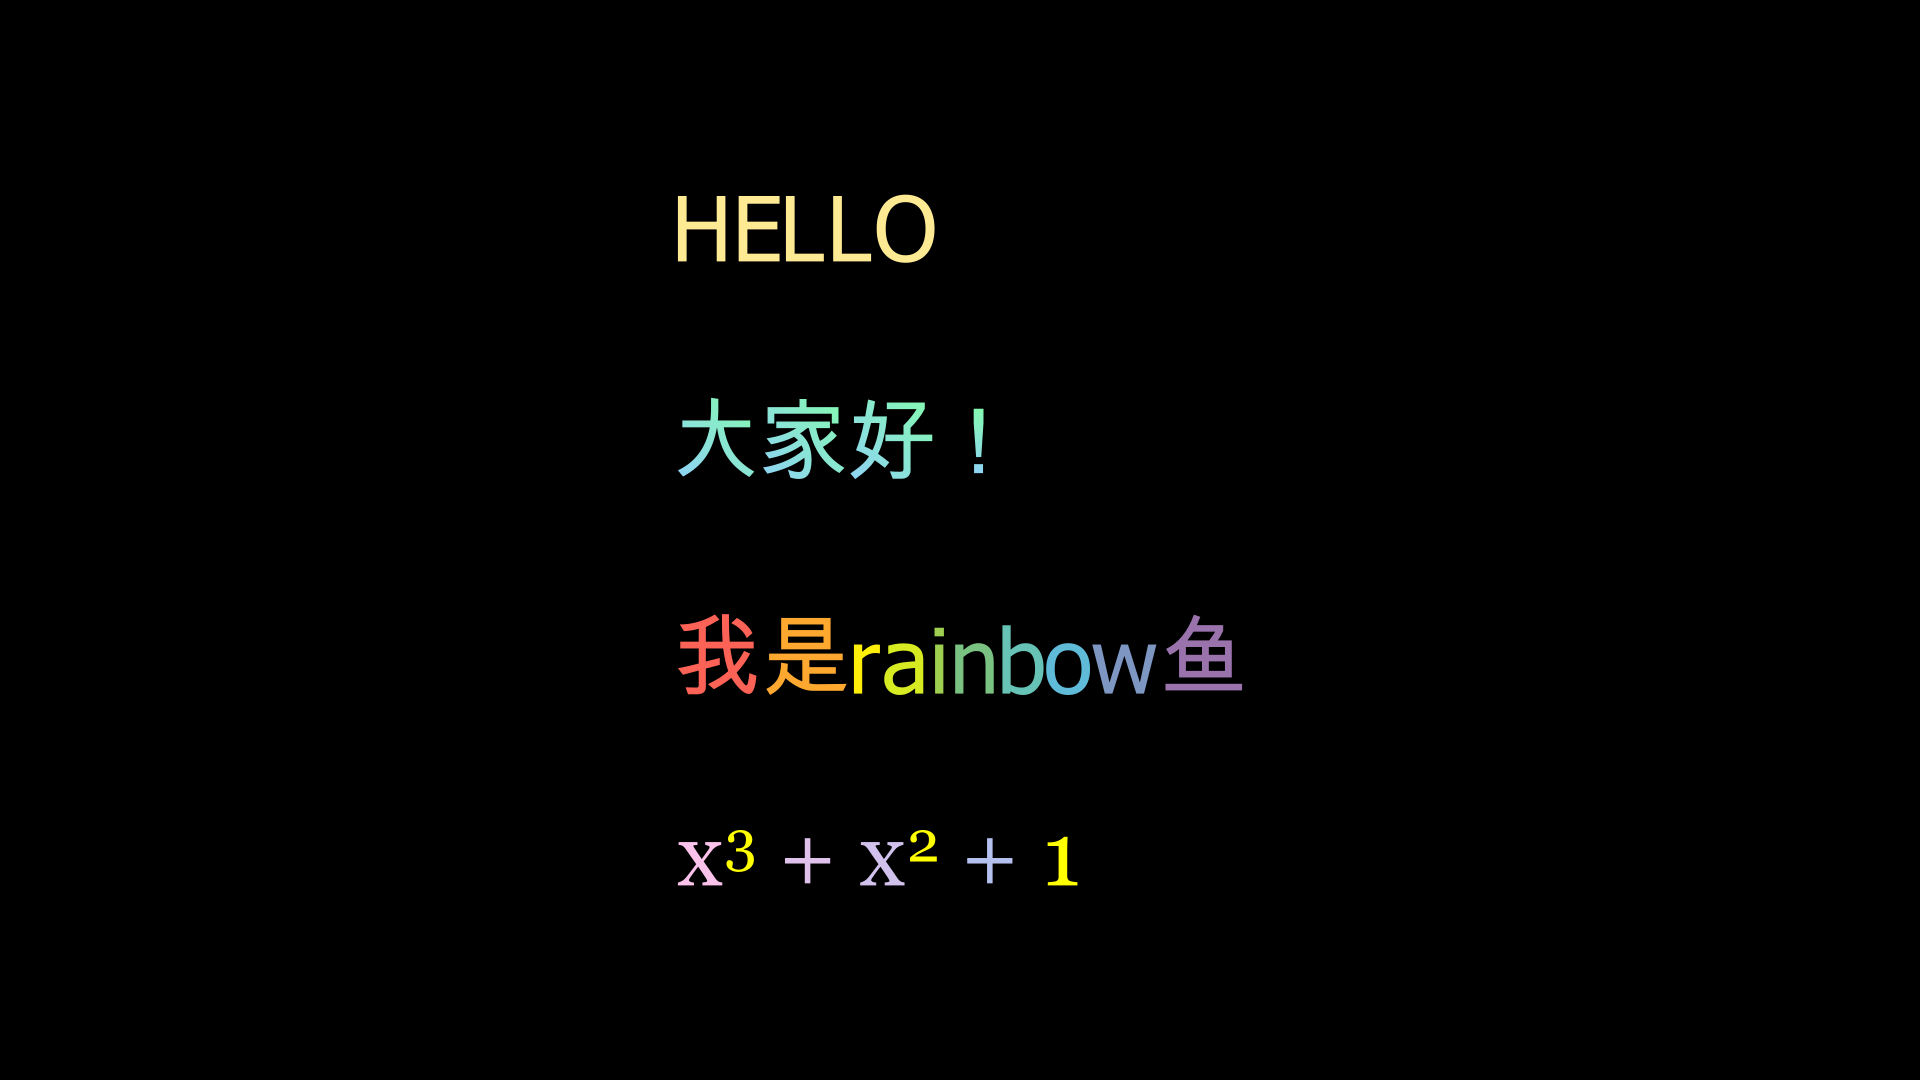

In [56]:
%%manim -qh -v WARNING Hello

class Hello(Scene):
    def construct(self):
        
        rainbow_tuple = (RED,YELLOW,GREEN,BLUE,PURPLE)
        test_text = VGroup(
            Text("HELLO",font=text_font[0]).set_color(YELLOW_B),
            Text("大家好！",font=text_font[0]).set_color_by_gradient(gradient_dict["favourite"]),
            MarkupText("我是rainbow鱼",gradient=rainbow_tuple,font=text_font[0]),
            MarkupText('x<sup><gradient from="RED" to="YELLOW">3</gradient></sup> + x<sup><gradient from="RED" to="YELLOW">2</gradient></sup> + <gradient from="RED" to="YELLOW">1</gradient>',gradient=tuple(gradient_dict["Rainy_Ashville"])),
        ).arrange(direction=DOWN,buff= 1,aligned_edge = LEFT,center=True)
        
        self.add(test_text)
        

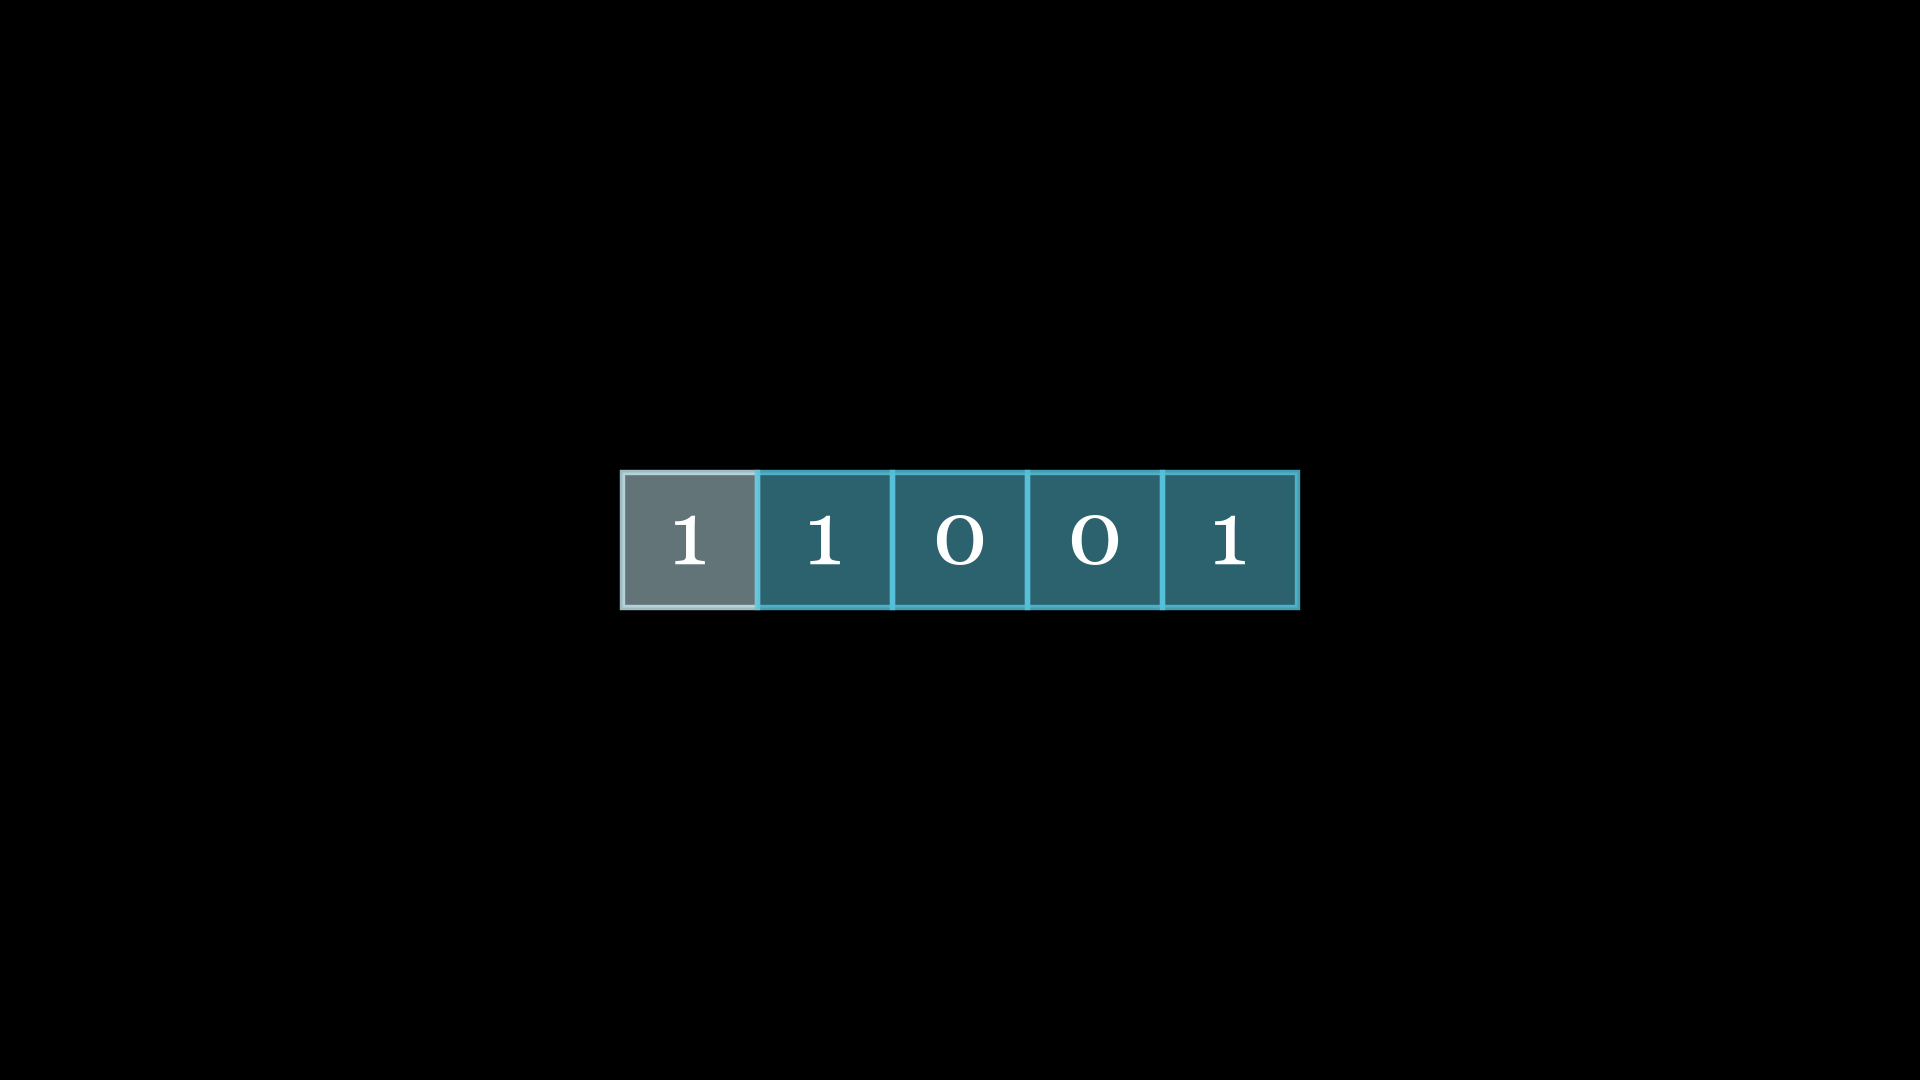

In [57]:
%%manim -qh -v WARNING VariableText

class VariableText(Scene):
    def construct(self):
        test_list = [1,1,0,0,1]
        test_blk = squ_tex(test_list)
        test_blk[-1][0].set_color(BLUE_A)
        squ_tex_add(self,test_blk,test_list)
    

In [2]:
%%manim -qh -v WARNING TextLayer

class TextLayer(Scene):
    def construct(self):
        text_layers = VGroup(
            Text("二进制转换",font=text_font[0]),
            Text("原码、反码、补码",font=text_font[0]),
            Text("定点加法",font=text_font[0]),
            Text("加法校验",font=text_font[0]),
            Text("位移运算",font=text_font[0]),
            Text("校验方法",font=text_font[0]),
            Text("定点乘法",font=text_font[0]),
            Text("浮点数运算",font=text_font[0]),
        ).set_color_by_gradient(gradient_dict["Child_Care"]).scale(1.5)
        
        for text_mode in range(len(text_layers)):
            self.play(Write(text_layers[text_mode]),run_time = 2)
            self.wait(3)
            self.play(Unwrite(text_layers[text_mode]),run_time = 0.5)
            self.wait()


In [155]:
%%manim -qh -v WARNING Dec2BinAxe

class Dec2BinAxe(Scene):
    # 线框
    @staticmethod
    def get_rectangle_corners(bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def dec_to_bin_axe(self,input_num,speed = 1):

        carry_list = split_into_integers(input_num)
        
        # 图像
        if input_num >= 1:
            ax = Axes(
                x_range=[0, 5, 1],
                y_range=[0, 16, 2],
                x_length=6,
                y_length=6,
                x_axis_config={
                    "numbers_to_include": np.arange(0, 5.01, 1),
                },
                y_axis_config={
                    "numbers_to_include": np.arange(0, 16.01, 2),
                },
                tips = False,
            ).shift(RIGHT*3)
        else:
            ax = Axes(
                x_range=[-5, 0, 1],
                y_range=[0, 1, 0.125],
                x_length=6,
                y_length=6,
                x_axis_config={
                    "numbers_to_include": np.arange(-5, 0.01, 1),
                },
                y_axis_config={
                    "numbers_to_include": np.arange(0, 1.01, 0.125),
                    "label_direction": RIGHT,
                },
                tips = False,
            ).shift(RIGHT*2.5)
        
        # 更新机
        t_times = ValueTracker(4) if input_num >= 1 else ValueTracker(0)
        t_num = ValueTracker(input_num)
        t_minus = ValueTracker(0)
        
        # 代码块
        if input_num >= 1:
            inp_blk = squ_tex_plus(ex_bin([input_num]))
        else:
            inp_blk = squ_tex_minus(ex_bin_dec(input_num))
        
        # 文字块
        tex_ori = VGroup(
            MathTex(f"{input_num} = "),
        ).shift(LEFT*5).shift(UP*1.5)
        tex_add = VGroup()
        
        def add_tex_expression(tex_add, carry_list):
            for i in range(len(carry_list)):
                tex_expression = f"2^{{{carry_list[i]}}}"
                if i != 0:
                    tex_expression = "+" + tex_expression
                tex_obj = MathTex(tex_expression)
                tex_add.add(tex_obj)
            return tex_add
        
        tex_add = add_tex_expression(tex_add, carry_list)
        
        # 函数
        if input_num >= 1:
            graph = ax.plot(
                lambda x: 2**x,
                color=BLUE_A,
                x_range=[0, 4, 0.01],
                use_smoothing=False,
            )
            labels = ax.get_graph_label(graph, label="2^x").set_color(WHITE)
        else:
            graph = ax.plot(
                lambda x: 2**x,
                color=BLUE_A,
                x_range=[-5, 0, 0.01],
                use_smoothing=False,
            )
            labels = ax.get_graph_label(graph, label="2^x").set_color(WHITE).shift(LEFT*1.5)
    
        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t_times.get_value(), 2**t_times.get_value())
                    )
                ]
            )
            polygon.stroke_width = 2
            polygon.set_fill(BLUE, opacity=0)
            polygon.set_stroke(WHITE,opacity=0.5)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t_times.get_value(), 2**t_times.get_value())))
        dot.set_z_index(10)
        
        dot_num = Dot().set_color_by_gradient([RED,ORANGE])
        dot_num.add_updater(lambda x: x.move_to(ax.c2p(0, t_num.get_value())))
        dot_num.set_z_index(10)
        
        dot_minus = Dot().set_color_by_gradient([GREEN,BLUE])
        dot_minus.add_updater(lambda x: x.move_to(ax.c2p(0, t_minus.get_value())))
        dot_minus.set_z_index(10)
        
        l1 = Line(dot_num.get_center(),dot_minus.get_center()).set_stroke(width=7).set_color_by_gradient([GREEN,RED])
        l1.add_updater(lambda x:x.become(Line(dot_num.get_center(),dot_minus.get_center()).set_stroke(width=7).set_color_by_gradient([GREEN,RED])))

        def update_y_axis_labels(axe):
            for label in axe.y_axis.numbers:
                if label.get_value() in [2, 4, 8, 16]:
                    label.set_color(YELLOW)
                else:
                    label.set_color(WHITE)

        ax.add_updater(update_y_axis_labels)

        # 动画
        ax_elem = VGroup(ax, graph, dot , polygon ,l1, labels,)
        self.play(Create(ax_elem), run_time=1.5/speed)
        self.play(Create(dot_num),Create(dot_minus),Write(tex_ori),run_time = 1/speed)
        ax_elem.add(dot_num,dot_minus)
        
        temp_num = input_num
        for i in range(len(carry_list)):
            self.play(t_times.animate.set_value(carry_list[i]),run_time = 1/speed)
            tex_add[i].next_to(tex_ori,direction=RIGHT)
            self.play(t_minus.animate.set_value(2**carry_list[i]),Write(tex_add[i]),run_time = 1/speed)
            tex_ori.add(tex_add[i])
            temp_num -= 2**carry_list[i]
            self.wait(1/speed)
            self.play(t_minus.animate.set_value(0),t_num.animate.set_value(temp_num),run_time = 1/speed)
            self.wait(1/speed)
        
        if input_num >= 1:
            squ_tex_create_dash(self, inp_blk, ex_bin([input_num]), -1.5, 5.8, 0.5 / speed, dash_line=-1)
        else:
            dash = squ_tex_create_dash(self, inp_blk, ex_bin_dec(input_num), -1.5, 5.8, 0.5 / speed, dash_line=1)
            ax_elem.add(dash)
        self.wait(1/speed)
        self.play(Uncreate(inp_blk),Uncreate(ax_elem),Uncreate(tex_ori),Uncreate(tex_add),run_time = 0.3)
    
    def construct(self):

        d2b_text = VGroup(
            Text("15的二进制转换",font=text_font[0]),
            Text("10的二进制转换",font=text_font[0]),
            Text("0.875的二进制转换",font=text_font[0]),
            Text("0.6875的二进制转换",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,d2b_text)
        self.dec_to_bin_axe(15)
        text_counter = text_scene_next(self,d2b_text,text_counter)
        self.dec_to_bin_axe(10,speed=1.6)
        text_counter = text_scene_next(self,d2b_text,text_counter)
        self.dec_to_bin_axe(0.875)
        text_scene_next(self,d2b_text,text_counter)
        self.dec_to_bin_axe(0.6875,speed=1.6)
        text_scene_end(self,d2b_text)

In [152]:
%%manim -qh -v WARNING OneAndTwosComplement

class OneAndTwosComplement(Scene):
    def one_and_two(self,num): 
        # 格式转换
        squ_list = [abs(num)]
        num_list = ex_bin_plus(num)
        if num >= 0:
            is_negative = 0
            squ_list = ['+']+convert_to_list(squ_list) #原数集合
        else:
            is_negative = 1
            squ_list = ['-']+convert_to_list(squ_list)
        
        fan_list = ex_com(num_list) # 反码
        bu_list  = ex_two(num_list) # 补码
        
        # 文字集
        num_text      = Text("整数",font=text_font[0]).shift(UP*1).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        num_yuan_text = Text("原码",font=text_font[0]).shift(UP*1).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        num_fan_text  = Text("反码",font=text_font[0]).shift(DOWN*1).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        num_bu_text   = Text("补码",font=text_font[0]).shift(DOWN*3).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        num_text_group= VGroup(num_text,num_yuan_text,num_fan_text,num_bu_text)
        num_text_group.shift(LEFT*5)
        
        # 解释文字
        i_text = 0  # 字段计数器
        if is_negative == 0:
            text_exp = VGroup(
                Text("我们得到一个正整数",font=text_font[0]),
                Text("我们先将这个数进行二进制转换为原码",font=text_font[0]),
                Text("首位为符号位，正整数的符号位为0",font=text_font[0]),
                Text("正整数的反码和原码相同",font=text_font[0]),
                Text("正整数的补码和原码相同",font=text_font[0]),
            ).shift(UP*2).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        else:
            text_exp = VGroup(
                Text("我们得到一个负整数",font=text_font[0]),
                Text("将这个数进行二进制转换为原码",font=text_font[0]),
                Text("首位为符号位，负整数的符号位为1",font=text_font[0]),
                Text("负数的反码是其原码除符号位的所有位取反",font=text_font[0]),
                Text("负数的补码是其反码加一",font=text_font[0]),
            ).shift(UP*2).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        
        # 数据块
        num_blk = squ_tex(
            squ_list,
            lambda i:typedict["blue_type"] if is_negative == 0 else typedict["red_type"],
        )
        num_yuan_blk = squ_tex(
            num_list,
            lambda i:typedict["red_type"] if is_negative == 1 and i == 0 else typedict["blue_type"],
        )
        num_fan_blk = squ_tex(
            fan_list,
            lambda i:typedict["blue_type"] if is_negative == 0 else typedict["red_type"],
        )
        num_bu_blk = squ_tex(
            bu_list,
            lambda i:typedict["blue_type"] if is_negative == 0 or num_list[i] == bu_list[i] else typedict["red_type"],
        )
            
        # 动画
        set_shift_left = 4
        self.play(Write(num_text),Write(text_exp[i_text]))
        i_text += 1
        self.wait()
        squ_tex_create(self,num_blk,squ_list,1,set_shift_left)
        self.wait(2.5)
        self.play(Uncreate(num_blk),Unwrite(num_text),Transform(text_exp[0],text_exp[i_text]))
        i_text += 1
        self.wait(2.5)
        
        self.play(Write(num_yuan_text))
        squ_tex_create(self,num_yuan_blk,num_list,1,set_shift_left)
        high_first = SurroundingRectangle(num_yuan_blk[-1], color=YELLOW, buff=0.01)
        self.play(Transform(text_exp[0],text_exp[i_text]),Create(high_first))
        i_text += 1
        self.wait(3)
        
        self.play(Write(num_fan_text),Transform(text_exp[0],text_exp[i_text]),Uncreate(high_first))
        i_text += 1
        self.wait(2)
        squ_tex_create_shift_down(self,num_fan_blk,fan_list,0,set_shift_left,0.2)
        self.wait(2)
        
        self.play(Write(num_bu_text),Transform(text_exp[0],text_exp[i_text]))
        self.wait(2)
        squ_tex_create_shift_down(self,num_bu_blk,bu_list,-2,set_shift_left,0.2)
        self.wait(4)
        self.play(
            Unwrite(text_exp[0]),
            Unwrite(num_text_group),
            Uncreate(num_yuan_blk),
            Uncreate(num_bu_blk),
            Uncreate(num_fan_blk),
            run_time = 0.3,
        )
        self.wait()
        
    def construct(self):
        one8two_text = VGroup(
            Text("正数的原反补码",font=text_font[0]),
            Text("负数的原反补码",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,one8two_text)
        self.one_and_two(86)
        text_scene_next(self,one8two_text,text_counter)
        self.one_and_two(-112)
        text_scene_end(self,one8two_text)
        self.play(Unwrite(one8two_text),run_time = 0.4)
        self.wait()

In [154]:
%%manim -qh -v WARNING BinAddition

class BinAddition(Scene):
    def bin_addition(self,add,added):
        # 转换
        add_list = ex_two(ex_bin_plus(add))
        added_list = ex_two(ex_bin_plus(added))
        res_list , carpos = binary_addition(add_list,added_list)
        res_list = res_list[len(res_list)-max(len(add_list),len(added_list)):]
        ex_list = ex_two(res_list)
         
        # 文字变换
        text_exp = VGroup(
            Text(f"在计算机中运行{add}{added}",font=text_font[0]).shift(UP*3),
            Text(f"{add}的补码:",font=text_font[0]),
            Text(f"{added}的补码:",font=text_font[0]),
            Text(f"={add+added}",font=text_font[0]),
            Text("进位：",font=text_font[0]),
        )
        text_exp[0].set_color_by_gradient(gradient_dict["Tempting_Azure"])
        text_exp[1:].arrange(direction=DOWN, aligned_edge = RIGHT ,buff=0.5).shift(LEFT*5).shift(DOWN*0.5).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        text_exp[4].shift(UP*4),text_exp[3].shift(UP)
        
        # 加数框框
        add_num = squ_tex(
            add_list,
            lambda i:typedict["red_type"] if i == 0 and add_list[i] == 1 else typedict["blue_type"]
        )
        # 被加数框框
        added_num = squ_tex(
            added_list,
            lambda i:typedict["red_type"] if i == 0 and added_list[i] == 1 else typedict["blue_type"],
        )
        # 结果框框
        res_num = squ_tex(
            res_list,
            lambda i:typedict["red_type"] if i == 0 and added_list[i] == 1 else typedict["blue_type"],
        )
        # 补码框框
        ex_num = squ_tex(
            ex_list,
            lambda i :typedict["red_type"] if i == 0 else typedict["blue_type"],
        )
        
        # 动画
        self.play(Write(text_exp[0]))
        self.play(Write(text_exp[1]))
        squ_tex_create(self,add_num,add_list,1)
        self.wait()
        self.play(Write(text_exp[2]))
        squ_tex_create(self,added_num,added_list)
        self.wait()
        squ_tex_create_addition(self,res_num,res_list,carpos)
        if add + added < 0:
            squ_tex_create_shift_down(self,ex_num,ex_list,-2,runtime=0.2)
            text_exp[3].shift(DOWN*3)
        else:
            text_exp[3].shift(DOWN)
        self.play(Write(text_exp[3]))
        self.wait(3)
        if add + added < 0:
            self.play(Uncreate(ex_num),run_time = 0.2)
        self.play(Uncreate(text_exp),Uncreate(add_num),Uncreate(added_num),Uncreate(res_num),run_time = 0.2)
        self.wait()
        
        
    def construct(self):
        bin_add_text = VGroup(
            Text("86-86",font=text_font[0]),
            Text("86-112",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,bin_add_text)
        self.bin_addition(86,-86)
        text_scene_next(self,bin_add_text,text_counter)
        self.bin_addition(86,-112)
        text_scene_end(self,bin_add_text)
        self.play(Unwrite(bin_add_text),run_time = 0.4)
        self.wait()

In [6]:
%%manim -qh -v WARNING AddCheck

class AddCheck(Scene):
    def add_check(self,add_mth,added_mth):    
        # 文字组
        text_mth = VGroup(
            Text(f"{add_mth}{added_mth}",font=text_font[0]),
            Text(f"{add_mth}+{added_mth}",font=text_font[0]),
        ).shift(UP*2.5).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        
        # 数据处理
        add_mth_list = ex_two(ex_bin_plus(add_mth))
        add_mth_list.insert(0,add_mth_list[0])
        added_mth_list = ex_two(ex_bin_plus(added_mth))
        added_mth_list.insert(0,added_mth_list[0])
        mth_res_list , mth_carpos = binary_addition(add_mth_list,added_mth_list)
        
        # 加法块
        add_mac = squ_tex(
            add_mth_list,
            lambda i: typedict["lightblue_type"] if i <= 1 else typedict["blue_type"],
        )
        added_mac = squ_tex(
            added_mth_list,
            lambda i: typedict["lightblue_type"] if i <= 1 else typedict["blue_type"],
        )
        res_mac = squ_tex(
            mth_res_list,
            lambda i: typedict["blue_type"] if i > 1 else (typedict["red_type"] if mth_res_list[0] != mth_res_list[1] else typedict["green_type"]),
        )
        
        # 动画
        self.play(Write(text_mth[0 if added_mth < 0 else 1]))
        self.wait()
        
        # 左偏移
        left_size = 5
        squ_tex_create(self,add_mac,add_mth_list,1,left_size,0.2)
        squ_tex_create(self,added_mac,added_mth_list,0,left_size,0.2)
        squ_tex_create_addition(self,res_mac,mth_res_list,mth_carpos,left_size)
        self.wait()
        
        # 亦或框框
        oplus_res = mth_res_list[0] ^ mth_res_list[1]
        highlight_or = SurroundingRectangle(res_mac[-2:], color=YELLOW, buff=0.01)
        xor = MathTex(f"{mth_res_list[0]} \\oplus {mth_res_list[1]} = {oplus_res}").scale(1.5).next_to(highlight_or,direction= DOWN,buff= 0.3).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        xor_text = Text("有效" if oplus_res == 0 else "溢出",font=text_font[0]).next_to(xor,direction= DOWN,buff= 0.3).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        self.play(Create(highlight_or))
        self.play(Write(xor))
        self.play(Write(xor_text))
        self.wait(2)
        
        other_gp = VGroup(highlight_or,xor_text,xor)
        if oplus_res == 0:
            self.play(
                Uncreate(other_gp),
                Uncreate(text_mth),
                Uncreate(add_mac),
                Uncreate(added_mac),
                Uncreate(res_mac),
                run_time = 0.3,
            )
        else:
            debug_text = Text("解决方法是在符号位后添加一位0",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]).shift(DOWN*2)
            add_append_blk = VGroup(
                Square(**typedict["yellow_type"]),
                Text("0"),
            ).shift(UP+LEFT*2.5)
            added_append_blk = VGroup(
                Square(**typedict["yellow_type"]),
                Text("0"),
            ).shift(LEFT*2.5)
            append_blk = VGroup(add_append_blk,added_append_blk)
            
            self.play(Uncreate(other_gp),Uncreate(res_mac))
            self.play(Write(debug_text))
            self.play(
                add_mac[:-2].animate.shift(RIGHT*0.5),
                add_mac[-2:].animate.shift(LEFT*0.5),
                added_mac[:-2].animate.shift(RIGHT*0.5),
                added_mac[-2:].animate.shift(LEFT*0.5),
                FadeIn(add_append_blk),
                FadeIn(added_append_blk),
            )
            add_mth_list.insert(2,0)
            added_mth_list.insert(2,0)
            res_list , carpos = binary_addition(add_mth_list,added_mth_list)
            res_mac = squ_tex(
                res_list,
                lambda i: typedict["green_type"] if i < 2 else typedict["blue_type"]
            )
            squ_tex_create_addition(self,res_mac,res_list,carpos,5.5,runtime=0.3)
            self.wait(3)
            self.play(
                Uncreate(append_blk),
                Uncreate(text_mth),
                Uncreate(debug_text),
                Uncreate(add_mac),
                Uncreate(added_mac),
                Uncreate(res_mac),
                run_time = 0.3,
            )
        self.wait()
        
    def construct(self):
        add_check_text = VGroup(
            Text("双符号位校验",font=text_font[0]),
            Text("溢出及解决方法",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,add_check_text)
        self.add_check(86,-112)
        text_scene_next(self,add_check_text,text_counter)
        self.add_check(86,86)
        text_scene_end(self,add_check_text)

In [6]:
%%manim -qh -v WARNING Slide

class Slide(Scene):
    def slide(self,mode = None ,show_list = None ,decimal_num = None):
        if mode is None:
            mode = 0 # 0为原码，1为补码
        if show_list is None:
            show_list = [0,0,0,1,1,0,0,0]

        power_list = [mode]
        slide_list = [0,0,0]
        slide_list_min = [1,1,1]
        power_blk = squ_tex(power_list, lambda i:typedict["lightblue_type"])
        show_blk = squ_tex(show_list)
        slide_blk = VGroup(
            squ_tex(slide_list,lambda i:typedict["green_type"]),
            squ_tex(show_list[:3],lambda i:typedict["blue_type"]),
            squ_tex(show_list[-3:],lambda i:typedict["blue_type"]),
            squ_tex(slide_list_min if mode == 1 and power_list[0] == 1 else slide_list,lambda i:typedict["red_type"]),
        )

        # 文字变量
        var = Variable(
            decimal_num,
            Text("十进制数",font=text_font[0]),
            num_decimal_places=0,
        ).shift(DOWN*2+LEFT).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        var.value.scale(1.5)
        
        self.wait()
        squ_tex_fade_in_from_large(self,power_blk,power_list,0,5)
        squ_tex_fade_in_from_large(self,show_blk,show_list,0,4)
        
        # 高亮框框和文字
        slide_highlight = SurroundingRectangle(power_blk,color=YELLOW,buff=0)
        slide_text = VGroup(
            Text("符号位不进行位移",font=text_font[0]),
            Text("原码在移动时空位补0",font=text_font[0]),
            Text("补码在右移时空位补充和符号位相同",font=text_font[0]),
        ).shift(UP*2).set_color_by_gradient(gradient_dict["Tempting_Azure"])
        self.play(Create(slide_highlight))
        self.play(Create(slide_text[0]))
        self.wait(3)
        if mode == 0:
            self.play(Transform(slide_text[0],slide_text[1]))
        else:
            self.play(Transform(slide_text[0],slide_text[2]))
        self.wait(3)
        self.play(Unwrite(slide_highlight),run_time = 0.2)
        self.play(Write(var))
        var_tracker = var.tracker
        
        self.wait()
        time_slide = 0.4
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[0],decimal_num,var_tracker,slide_left,2
        )
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[1],decimal_num,var_tracker,slide_right,2
        )
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[3],decimal_num,var_tracker,slide_right,2
        )
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[2],decimal_num,var_tracker,slide_left,2,time_slide
        )
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[0],decimal_num,var_tracker,slide_left,3,time_slide
        )  
        decimal_num = squ_tex_slide_variable(
            self,show_blk,slide_blk[1],decimal_num,var_tracker,slide_right,3,time_slide/2
        )
        squ_tex_slide_variable(
            self,show_blk,slide_blk[3],decimal_num,var_tracker,slide_right,3,time_slide/2
        )
        self.play(
            Uncreate(slide_text[0]),
            FadeOut(var),
            Uncreate(show_blk),
            Uncreate(power_blk),
        )
        self.wait()
        
    def construct(self):
        slide_text_construct = VGroup(
            Text("原码的位移",font=text_font[0]),
            Text("补码的位移",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,slide_text_construct)
        self.slide(0,[0,0,0,1,1,0,0,0],24)
        text_scene_next(self,slide_text_construct,text_counter)
        self.slide(1,[1,1,1,0,1,0,0,0],-24)
        text_scene_end(self,slide_text_construct)

In [62]:
"""

--------
因为和Slide的算法不接轨所以被我弃用的一个场景
一开始写的slide是使用"left"和"right"作为字典
会导致判断条件过多于是打算使用Pr大法
后来改进算法后改用元组表示左右后该场景被弃用

"""

%%manim -qh -v WARNING SlideText

class SlideText(Scene):
    def construct(self):
        def add_tex_inner(text_vgp, result_num, temp, add_blk, times, is_time = 1, runtime = 1, start = 0):
            for i in range(times):
                if is_time == 0:
                    result_num //= 2
                else:
                    result_num *= 2
                self.play(add_tex(text_vgp, result_num, temp, add_blk[i + start]), run_time = runtime)
                self.wait(runtime)
            return result_num
        
        def remove_tex_inner(text_vgp, result_num, temp, times, is_time = 1, runtime = 1):
            for i in range(times):
                if is_time == 0:
                    result_num //= 2
                else:
                    result_num *= 2
                self.play(remove_tex(text_vgp, result_num, temp), run_time = runtime)
                self.wait(runtime)
            return result_num
            
        
        slide_num = -24
        result_num_input = slide_num
        text_vgp_input = VGroup(
            MathTex(f"{slide_num}"),
            MathTex(f" = {result_num_input}"),
        ).arrange()
        add_blk_input = VGroup(
            MathTex("\\times 2"),
            MathTex("\\times 2"),
            MathTex("\\times 2"),
            MathTex("\\div 2"),
            MathTex("\\div 2"),
            MathTex("\\div 2"),
        )
        temp_input = VGroup()
        
        time_slide = 0.4
        self.play(Write(temp_input))
        self.play(Transform(temp_input,text_vgp_input))
        self.wait()
        
        result_num_input = add_tex_inner(text_vgp_input,result_num_input,temp_input,add_blk_input,2,1)
        result_num_input = remove_tex_inner(text_vgp_input,result_num_input,temp_input,2,0)
        result_num_input = add_tex_inner(text_vgp_input,result_num_input,temp_input,add_blk_input,2,0,start=3)
        result_num_input = remove_tex_inner(text_vgp_input,result_num_input,temp_input,2,1)
        result_num_input = add_tex_inner(text_vgp_input,result_num_input,temp_input,add_blk_input,3,1,runtime=time_slide)
        result_num_input = remove_tex_inner(text_vgp_input,result_num_input,temp_input,3,0,runtime=time_slide/2)
        add_tex_inner(text_vgp_input,result_num_input,temp_input,add_blk_input,3,0,start=3,runtime=time_slide/2)
        
        self.wait()
        
        

In [10]:
%%manim -qh -v WARNING SlideError

class SlideError(Scene):
    def construct(self):

        # ori1
        ori1_list = [0,1,1,0,1]
        ori1_head = squ_tex(ori1_list[:1],lambda i:typedict["lightblue_type"])
        ori1_blk = squ_tex(ori1_list[1:])
        ori1 = VGroup(ori1_head,ori1_blk)
        error_left_list = [0,0,0,0]
        error_left_blk = squ_tex(
            error_left_list,
            lambda i: typedict["red_type"] if i == 3 else typedict["blue_type"]
        )
        
        # ori2
        ori2_list = [1,0,1,0,1]
        ori2_head = squ_tex(ori2_list[:1],lambda i:typedict["lightblue_type"])
        ori2_blk = squ_tex(ori2_list[1:])
        ori2 = VGroup(ori2_head,ori2_blk)
        error_right_list = [0,0,1,1]
        error_right_blk = squ_tex(
            error_right_list,
            lambda i: typedict["red_type"] if i == 2 else typedict["blue_type"]
        )
        
        # 文字
        text_error = VGroup(
            Text("以补码为例，左右移动后会产生差错",font=text_font[0]).shift(UP*3).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
            Text("移位运算会产生缺失或溢出",font=text_font[0]).shift(DOWN*3).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
        )
        
        # 分割线
        dif_line = Line([0,-2,0],[0,2,0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"])
        
        # 动画
        self.play(Create(dif_line),Write(text_error[0]))
        self.wait()
        
        # ori1
        ori1_scene = VGroup(ori1_blk,ori1_head)
        squ_tex_fade_in_from_large(self,ori1_head,[0],1,7.5) 
        squ_tex_fade_in_from_large(self,ori1_blk,ori1_list[1:],1,6.5) 
        ori1_scene.add(ori1.copy())
        self.add(ori1_scene[2])
        self.play(ori1.animate.shift(DOWN))
        squ_tex_slide(self,ori1_blk,error_left_blk[2:],slide_right,2,0.5)
        ori1_scene.add(ori1.copy())
        self.add(ori1_scene[3])
        self.play(ori1.animate.shift(DOWN))
        squ_tex_slide(self,ori1_blk,error_left_blk[:2],slide_left,2,0.5)
        
        # ori2
        ori2_scene = VGroup(ori2_blk,ori2_head)
        squ_tex_fade_in_from_large(self,ori2_head,[0],1,0.5) 
        squ_tex_fade_in_from_large(self,ori2_blk,ori2_list[1:],1,-0.5) 
        ori2_scene.add(ori2.copy())
        self.add(ori2_scene[2])
        self.play(ori2.animate.shift(DOWN))
        squ_tex_slide(self,ori2_blk,error_right_blk[2:],slide_left,2,0.5)
        ori2_scene.add(ori2.copy())
        self.add(ori2_scene[3])
        self.play(ori2.animate.shift(DOWN))
        squ_tex_slide(self,ori2_blk,error_right_blk[:2],slide_right,2,0.5)
        
        self.wait()
        surround_squ = VGroup(
            Rectangle(**typedict["rec_yellow3"]).shift(LEFT*1.5),
            Rectangle(**typedict["rec_yellow3"]).shift(RIGHT*2.5),
        )
        
        # 最终标志框
        self.play(Create(surround_squ))
        self.wait()
        
        self.play(Write(text_error[1]))
        self.wait(3)
        
        self.play(
            Unwrite(text_error),
            Uncreate(dif_line),
            Uncreate(ori1_scene),
            Uncreate(ori2_scene),
            Uncreate(surround_squ),
            run_time = 0.3,
        )
        self.wait()
        

In [51]:
%%manim -qh -v WARNING Text4DeError

class Text4DeError(ZoomedScene):

    def parity_check(self): 
        """奇偶校验"""
        example_text = VGroup(
            Text("规定奇校验",font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]).shift(UP*2),
            Text("原数",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text("1的个数为偶数个,则在末尾添加一位1",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]).shift(DOWN),
            Text("发送的数",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text("接收时若1个数为偶数则需重发",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]).shift(DOWN),
        )
        example_text[1:4:2].arrange(direction=DOWN,buff=2.5,aligned_edge = RIGHT).shift(DOWN).shift(LEFT*5)
        
        example_list = [1,1,0,1,1,0,0,0]
        example_blk = squ_tex(
            example_list,
        )
            
        example_blk_changed = VGroup(
            Square(**typedict["red_type"]),
            Text("1")
        ).shift(RIGHT*5).shift(DOWN*2.5)
        
        self.play(Write(example_text[0]))
        self.play(Write(example_text[1]))
        squ_tex_fade_in_from_large(self,example_blk,example_list,0.5,4)
        self.wait(2)
        self.play(
            example_blk[-2][0].animate.set_color(RED),
            example_blk[-1][0].animate.set_color(RED),
            example_blk[-5][0].animate.set_color(RED),
            example_blk[-4][0].animate.set_color(RED),
        )
        example_red_blk = VGroup()
        for i in range(len(example_list)):
            if example_list[i] == 1:
                example_red_blk.add(example_blk[-i-1].copy())
        
        self.wait()
        self.play(Transform(example_red_blk,example_text[2]))
        self.wait(2)
        self.play(Write(example_text[3]))
        temp_blk = example_blk.copy()
        self.play(temp_blk.animate.shift(DOWN*3))
        self.play(FadeIn(example_blk_changed))
        self.wait(2)
        self.play(Transform(example_red_blk,example_text[4]))
        self.wait(5)
        self.play(
            Uncreate(example_blk),
            Uncreate(temp_blk),
            Unwrite(example_text[:2]),
            Unwrite(example_text[3]),
            Unwrite(example_red_blk),
            Uncreate(example_blk_changed),
            run_time = 0.2,
        )
        self.wait()
    
    
    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=0.3,
            zoomed_display_height=3,
            zoomed_display_width=12,
            image_frame_stroke_width=20,
            zoomed_camera_config={
                "default_frame_stroke_width": 3,
                },
            **kwargs
        )
    
    
    def  crc_check(self):
        """循环冗余校验"""
        format_text = VGroup(
            MarkupText(
                'x<sup>3</sup> + x<sup>2</sup> + 1',
                gradient=(tuple(gradient_dict["Tempting_Azure"])),
            ),
            MarkupText(
                'x<sup><gradient from="RED" to="YELLOW">3</gradient></sup> + x<sup>2</sup> + 1',
                gradient=(tuple(gradient_dict["Tempting_Azure"])),
            ),
            MarkupText(
                'x<sup><gradient from="RED" to="YELLOW">3</gradient></sup> + x<sup><gradient from="RED" to="YELLOW">2</gradient></sup> + <gradient from="RED" to="YELLOW">1</gradient>',
                gradient=(tuple(gradient_dict["Tempting_Azure"])),
            ),
        )
        
        crc_text = VGroup(
            Text("规定生成式：",font=text_font[0]),
            Text("原数：",font=text_font[0]).shift(LEFT*4.8+UP),
            Text("÷",font=text_font[0]).shift(RIGHT*2+UP),
            Text("=",font=text_font[0]).shift(LEFT*6+DOWN),
            Text("余数",font=text_font[0]).shift(LEFT*0.5+DOWN),
            Text("发送的数：",font=text_font[0]).shift(LEFT*4.8+DOWN*3),
            Text("收到校验：",font=text_font[0]).shift(LEFT*4.8+UP),
            Text("若收到的数检验后余数不为0则需重发",font=text_font[0]).shift(DOWN*3),
        )
        crc_text[0].set_color_by_gradient(gradient_dict["Tempting_Azure"])
        crc_text[1:-1].set_color_by_gradient(gradient_dict["Rainy_Ashville"])
        crc_text[-1].set_color_by_gradient(gradient_dict["Sunny_Morning"])
        
        title_vgp = VGroup(
            VGroup(
                crc_text[0],
                format_text[0],
            ).arrange(buff=0.5),
            VGroup(
                crc_text[0],
                format_text[1],
            ).arrange(buff=0.5),
            VGroup(
                crc_text[0],
                format_text[2],
            ).arrange(buff=0.5),
        ).shift(UP*2)
        
        crc_ori_list = [1,1,0,1,1]
        crc_format_list = [0,0,0]
        crc_div_list = [1,1,0,1]
        crc_res_list = [1,0,0,1]
        crc_mod_list = [1,0,1]
        
        crc_first_list = crc_ori_list+crc_format_list
        
        crc_first_blk = squ_tex(crc_first_list)
        crc_div_blk = squ_tex(
            crc_div_list,
            lambda i:typedict["yellow_type"]
        )
        crc_res_blk = squ_tex(
            crc_res_list,
            lambda i:typedict["lightblue_type"],
        )
        crc_mod_blk = squ_tex(
            crc_mod_list,
            lambda i:typedict["red_type"],
        )
        
        self.play(Write(title_vgp[0]),Write(crc_text[1]))
        squ_tex_fade_in_from_large(self,crc_first_blk[-5:],crc_first_list[-5:],1,3)
        self.wait(2)
        self.play(
            Unwrite(crc_text[1]),
            crc_first_blk[-5:].animate.shift(LEFT*4),
        )
        self.wait()
        u , z , f = zoom_camera_focus(self,title_vgp[0][1],zoom_shift=DOWN*2+LEFT*0.5)
        self.wait()
        self.play(Transform(title_vgp[0],title_vgp[1]))
        self.wait()
        self.play(FadeOut(z))
        self.wait()
        squ_tex_fade_in_from_large(self,crc_first_blk[:-5],crc_first_list[:-5],1,2)
        self.wait()
        
        self.play(Write(crc_text[2]))
        self.wait()
        self.play(FadeIn(z))
        self.wait()
        self.play(Transform(title_vgp[0],title_vgp[2]),)
        self.wait()
        zoom_camera_defocus(self, u , z , f)
        squ_tex_fade_in_from_large(self,crc_div_blk,crc_div_list,1,-2)
        self.wait()
        
        self.play(Write(crc_text[3]))
        squ_tex_fade_in_from_large(self,crc_res_blk,crc_res_list,-1,6)
        self.play(Write(crc_text[4]))
        squ_tex_fade_in_from_large(self,crc_mod_blk,crc_mod_list,-1,0)
        self.wait(2)
        
        self.play(Write(crc_text[5]))
        crc_ori_copy = crc_first_blk[-5:].copy()
        crc_mode_copy = crc_mod_blk.copy()
        crc_next_blk = VGroup(crc_ori_copy,crc_mode_copy)
        self.play(
            crc_ori_copy.animate.shift(DOWN*4+RIGHT*4),
            crc_mode_copy.animate.shift(DOWN*2+RIGHT*2)
        )
        self.wait(3)
        
        
        self.play(
            FadeOut(crc_text[2:6]),
            FadeOut(crc_first_blk),
            FadeOut(crc_div_blk),
            FadeOut(crc_res_blk),
            FadeOut(crc_mod_blk),
            crc_next_blk.animate.shift(UP*4),
        )
        self.play(Write(crc_text[6]))
        self.wait(2)
        self.play(
            Unwrite(crc_text[6]),
            crc_next_blk.animate.shift(LEFT*4)
        )
        self.wait()
        self.play(FadeIn(crc_text[2]))
        self.wait()
        self.play(FadeIn(crc_div_blk))
        self.wait()
        self.play(FadeIn(crc_text[3]))
        self.play(FadeIn(crc_res_blk))
        self.play(FadeIn(crc_text[4]))
        self.play(FadeIn(crc_mod_blk[1:2]))
        self.wait()
        self.play(FadeIn(crc_text[7]))
        self.wait(3)
        self.play(
            Unwrite(crc_text[2:5]),
            Unwrite(crc_text[0]),
            Unwrite(crc_text[7]),
            FadeOut(crc_first_blk),
            FadeOut(crc_div_blk),
            FadeOut(crc_res_blk),
            FadeOut(crc_mod_blk),
            FadeOut(crc_next_blk),
            FadeOut(format_text[0]),
            run_time = 0.4,
        )
        self.wait()
    
    
    def sum_check(self):
        """校验和"""
        sum_text = VGroup(
            Text("原数",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(LEFT*5).shift(UP*2),
            Text("接收时若数据不等于十进制数，则需重发",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]).shift(DOWN*2),
            
        )
        
        sum_list = [1,1,0,1,1,0,0,0]
        sum_blk = squ_tex(sum_list)
        
        self.play(Write(sum_text[0]))
        squ_tex_fade_in_from_large(self,sum_blk,sum_list,2,4)
        sum_surrounding = SurroundingRectangle(sum_blk[-1],buff = 0.01)
        
        pow_num = 2**(len(sum_list)-1)
        sum_num = 0
        var_check = Variable(
            pow_num,
            Text("十进制数",font=text_font[0]),
            num_decimal_places=0,
        ).shift(LEFT).set_color_by_gradient(gradient_dict["Rainy_Ashville"])
        var_check.value.scale(1.5)
        check_tracker = var_check.tracker
        self.play(Write(var_check),Create(sum_surrounding))
        
        for i in sum_list:
            if i == 1:
                sum_num += pow_num
            self.play(check_tracker.animate.set_value(sum_num),run_time = 0.5)
            self.wait(0.5)
            self.play(sum_surrounding.animate.shift(RIGHT),run_time = 0.5)
            pow_num /= 2
        
        self.play(Uncreate(sum_surrounding))
        self.play(Write(sum_text[1]))
        self.wait(4)
        self.play(
            Unwrite(sum_text),
            Unwrite(var_check),
            Uncreate(sum_blk),
            run_time = 0.3
        )
        self.wait()
    
    def construct(self):
        check_text = VGroup(
            Text("奇偶校验",font=text_font[0]),
            Text("循环冗余校验",font=text_font[0]),
            Text("校验和",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,check_text)
        self.parity_check()
        text_counter = text_scene_next(self,check_text,text_counter)
        self.crc_check()
        text_scene_next(self,check_text,text_counter)
        self.sum_check()
        text_scene_end(self,check_text)
        

In [28]:
'''

--------
这段代码是最开始写的
一开始没有系统地学过manim和python
也没想到要把他做成一个小工程
所以也没有定义函数所以很乱
但是可以展现一步步的逻辑所以被保留
由于一些函数如ex_two和ex_com被修改过所以无法继续使用
重构的在下面的Booth代码块
booth_simple是重构
booth_compare是booth比较

'''

%%manim -qh -v WARNING Sicho4

class Sicho4(Scene):
    def construct(self):
        # 初始定义
        # 可改项
        n = 5
        timequality = 1 #时间权值
        b = [0,1,1,0,1]  #被乘数
        t = [0,1,1,0,1]  #乘数
        
        a = [0]*n #初始
        none = [0]*n  #失效被乘数
        if t[-1] == 1:
            f = binary_addition(a,t) #结果
        else:
            f = binary_addition(a,none)
        
        # 开局文字
        open_title = VGroup(
            Text("0." + ''.join([str(x) for x in b[1:n]])).shift(LEFT*1.5),
            Text("×"),
            Text("0." + ''.join([str(x) for x in t[1:n]])).shift(RIGHT*1.5),
        )
        
        #初始化
        zer = VGroup()
        for i in range(n-1):
            zer.add(VGroup(
                Square(**typedict["blue_type"]),
                Text("0"),
            ).shift(LEFT*n).shift(DOWN)
        )
        zernone = VGroup()
        for i in range(n-1):
            zernone.add(VGroup(
                Square(**typedict["blue_type"]),
                Text("0"),
            ))
        
        # 被乘数框框
        ori = VGroup()
        for i in range(n):
            ori.add(VGroup(
                Square(**typedict["blue_type"]),
                Text(str(a[i])),
            ))
        
        # 乘数框框
        times = VGroup()
        for i in range(n-1):
            times.add(VGroup(
            Square(**typedict["red_type"]),
            Text(str(t[i+1])),
        ))
        
        # 加法
        addfx = VGroup()
        for i in range(n-1):
            addfx.add(VGroup(
                Square(**typedict["blue_type"]),
                Text(str(b[i+1])),
            ))
            
        # 最后
        final = VGroup()
        for i in range(len(f)):
            final.add(VGroup(
                Square(**typedict["blue_type"]),
                Text(str(f[i])),
            ))
        
        
        # 小数线
        dashline = DashedLine(start=[0, -2.5, 0], end=[0, 2.5, 0]).set_color_by_gradient([GREEN,BLUE])
        line = Line(start=[-6, 0, 0], end=[0, 0 , 0]).set_color(GRAY).shift(DOWN*0.5)
            
        # 标题
        self.play(Write(open_title))
        self.wait()
        self.play(open_title.animate.move_to(LEFT*4 + UP*3.3))
          
        # 小数线
        dashline.shift(LEFT*4.5)
        self.play(Create(dashline),run_time = 0.5)
            
        # 被乘数框
        for i in range (n):
            ori[i].shift(LEFT*(n-i)).shift(UP)
            self.play(Create(ori[i]),run_time = 0.2)
        if timequality == 1:
            highoir = SurroundingRectangle(ori, color=YELLOW, buff=0.05)
            texori = Text("初始置零").next_to(ori, direction=UP, buff=0.3).set_color_by_gradient([RED_D,YELLOW_D])
            self.play(Create(highoir))
            self.play(Write(texori))
            self.wait(1.5)
            self.play(Uncreate(highoir),Unwrite(texori))
            
        # 标题高亮
        hightimes = SurroundingRectangle(open_title[2], color=YELLOW, buff=0.1)
        self.play(Create(hightimes))
        
        # 乘数框
        for i in range (n-1):
            times[i].shift(LEFT*(n-i-6)).shift(UP)
            self.play(Create(times[i]),run_time = 0.3)
        self.play(Uncreate(hightimes))
        
        for bigi in range(n-1): 
            # 时间设定
            if bigi == 0:
                timet = 2
            else: 
                timet = 1
            timecontrol = timet * timequality
            
            #加法
            hightimesquare = SurroundingRectangle(times[3], color=YELLOW, buff=0.05)
            highbytime = SurroundingRectangle(open_title[0], color=YELLOW, buff=0.1)
            self.play(Create(hightimesquare))
            if bigi == 0:
                self.wait()
            self.play(Transform(hightimesquare,highbytime))
            for i in range (n-1):
                if bigi == 0:
                    addfx[i].shift(LEFT*(n-i-1))
                    zernone[i].shift(LEFT*(n-i-1))
                if t[-1] == 1:
                    self.play(Create(addfx[i]),run_time = 0.2)
                else:
                    self.play(Create(zernone[i]),run_time = 0.2)
            if bigi == 0:
                self.wait(0.5*timecontrol)
                self.play(Uncreate(hightimesquare),Create(line))
                self.wait(timecontrol)
            else:
                self.play(Uncreate(hightimesquare))
            
            # 结果
            for i in range(n-1, -1, -1):
                final[i].shift(LEFT*(n-i)).shift(DOWN)
                self.play(Create(final[i]),run_time = 0.25*timet)
            self.wait(1)
            
            # 移位
            self.play(times.animate.shift(DOWN*2))
            self.wait()
            self.play(final.animate.shift(RIGHT),final[4].animate.shift(RIGHT*2), times.animate.shift(RIGHT),FadeOut(times[3], shift=RIGHT))
            self.wait(timecontrol)
            if t[-1] == 1:
                self.play(FadeOut(addfx),FadeOut(ori))
            else:
                self.play(FadeOut(zernone),FadeOut(ori))
            
            #更新
            a = [0] + f[0:n-1]
            t.pop()
            t.insert(0,f[-1])
            if t[-1] == 1:
                f = binary_addition(a,b) #结果
            else:
                f = binary_addition(a,none)
            times.remove(times[-1])
            times.insert(0,final[-1])
            final.remove(final[-1])
            ori.become(final)
            ori.insert(0,zer[bigi])
            ori.shift(UP*2)

            #复位
            ori.shift(DOWN*2)
            self.add(ori)
            self.remove(final)
            self.play(times.animate.shift(UP*2),ori.animate.shift(UP*2))
            final = VGroup()
            for i in range(len(f)):
                final.add(VGroup(
                    Square(**typedict["blue_type"]),
                    Text(str(f[i])),
                ))
            self.wait(timecontrol)
        
        #最终结果
        restex = " =  0." + ''.join([str(x) for x in a[1:n] + t[0:n-1]])
        res = Text(restex)
        res.next_to(open_title,direction=RIGHT,buff= 0.5)
        self.play(Write(res))
        self.wait()
        

UsageError: Line magic function `%%manim` not found.


In [65]:
%%manim -qh -v WARNING Booth
class Booth(Scene):
    
    # 单点乘法
    def booth_simple(self,be_timed_num,time_num):
        be_timed_list = ex_bin_dec(be_timed_num)
        time_list = ex_bin_dec(time_num)
        time_list = time_list[1:]
        auto_len = max(len(be_timed_list),len(time_list))
        ori_list = [0]*auto_len
        ori_blk = squ_tex(
            ori_list,
            lambda i:typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
        )
        time_blk = squ_tex(
            time_list,
            lambda i: typedict["red_type"],
        )
        
        # 开局文字
        open_title = VGroup(
            Text(f"{dec_to_bin(be_timed_num)}",font=text_font[0]),
            Text("×",font=text_font[0]),
            Text(f"{dec_to_bin(time_num)}",font=text_font[0]),
        ).set_color_by_gradient(gradient_dict["Child_Care"]).arrange()
        
        dash_simple = VGroup()
            
        # 动画 
        # 标题
        self.play(Write(open_title))
        self.wait()
        self.play(open_title.animate.to_edge(UL))
        
        # 被乘数框
        dash_simple_ori = squ_tex_create_dash(self,ori_blk,ori_list,1,6,0.3,dash_line=1)
        dash_simple.add(dash_simple_ori)
        high_oir = SurroundingRectangle(ori_blk, color=YELLOW, buff=0.01)
        text_ori = Text("初始置零",font=text_font[0]).next_to(ori_blk, direction=UP, buff=0.3).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        self.play(Create(high_oir),Write(text_ori))
        self.wait(1.5)
        self.play(Uncreate(high_oir),Unwrite(text_ori))
        
        # 标题高亮
        high_times = SurroundingRectangle(open_title[2], color=YELLOW, buff=0.1)
        self.play(Create(high_times))
        squ_tex_create_dash(self,time_blk,time_list,1,0,0.3)
        self.play(Uncreate(high_times))
        
        for j in range(len(time_list)):    
            current_list = time_process(time_list[-1],be_timed_list)
            res_list , carpos = binary_addition(ori_list,current_list)
            res_list = res_list[len(res_list)-len(time_list)-1:]
            
            current_blk = squ_tex(
                current_list,
                lambda i:typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
            )
            res_blk = squ_tex(res_list)
            
            slide_time = 0.3
            highlight_times = SurroundingRectangle(time_blk[0], color=YELLOW, buff=0.01)
            highlight_title = SurroundingRectangle(open_title[0], color=YELLOW, buff=0.05)
            self.play(Create(highlight_times))
            self.wait()
            self.play(Transform(highlight_times,highlight_title))
            dash_simple_tempt = squ_tex_create_dash(
                self,current_blk,current_list,0,6,slide_time,dash_line=1
            )
            dash_simple.add(dash_simple_tempt)
            self.play(Uncreate(highlight_times))
            squ_tex_create_addition(self,res_blk,res_list,carpos,6,runtime=0.3)
            self.play(time_blk.animate.shift(DOWN*2))
            
            time_list , time_blk , res_list , res_blk , power_blk = booth_slide(
                self,
                time_list , time_blk,
                res_list , res_blk,
            )
            ori_list = res_list
                    
            self.play(
                FadeOut(ori_blk,shift=UP*2),
                FadeOut(current_blk,shift=UP*2),
                res_blk.animate.shift(UP*2),
                time_blk.animate.shift(UP*2),
            )
            ori_blk = squ_tex(res_list)
            squ_tex_add(self,ori_blk,ori_list,1,6)
            self.remove(res_blk).remove(power_blk)
            self.wait()
            
        #最终结果
        res_text = Text(f" = {dec_to_bin(time_num*be_timed_num)}",font=text_font[0]).set_color_by_gradient(gradient_dict["Child_Care"])
        res_text.next_to(open_title,direction=RIGHT,buff= 0.5)
        self.play(Write(res_text))
        self.wait(3)
        self.play(
            Uncreate(ori_blk),
            Uncreate(time_blk),
            Unwrite(res_text),
            Unwrite(open_title),
            Uncreate(dash_simple),
        )
        self.wait()
    
    
        
    # booth比较法
    def booth_compare(self,be_timed_num,time_num):
        be_timed_list = ex_two(ex_bin_dec(be_timed_num,2))
        time_list = ex_two(ex_bin_dec(time_num))
        time_list.append(0)
        auto_len = max(len(be_timed_list),len(time_list))
        ori_list = [0]*auto_len
        ori_blk = squ_tex(
            ori_list,
            lambda i:typedict["lightblue_type"] if i < 2 else typedict["blue_type"],
        )
        time_blk = squ_tex(
            time_list,
            lambda i: typedict["red_type"],
        )
        
        # 开局文字
        open_title = VGroup(
            Text(f"{dec_to_bin(be_timed_num)}",font=text_font[0]),
            Text("×",font=text_font[0]),
            Text(f"({dec_to_bin(time_num)})",font=text_font[0]),
        ).set_color_by_gradient(gradient_dict["Child_Care"]).arrange()
        
        dash_compare = VGroup()
        
        # 预处理文字
        pre_opera_text = VGroup(
            Text("我们先对数据进行预处理，令原式为 x×y",font=text_font[0]).shift(UP*2).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text("[x]补:",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
            Text("[-x]补:",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
            Text("[y]补:",font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
        )
        pre_opera_text[1:].arrange(direction=DOWN, aligned_edge = RIGHT ,buff=1.2).shift(LEFT*5).shift(DOWN*1)
        # 预处理代码块
        pre_opera_blk = VGroup(
            squ_tex(
                ex_two(ex_bin_dec(be_timed_num)),
                lambda i: typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
            ),
            squ_tex(
                ex_two(ex_bin_dec(be_timed_num),0),
                lambda i: typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
            ),
            squ_tex(
                ex_two(ex_bin_dec(time_num)),
                lambda i: typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
            ),
        )
        dash_pre = VGroup()
            
        # 动画 
        # 标题
        self.play(Write(open_title))
        self.wait()
        self.play(open_title.animate.to_edge(UL))
        
        # 预处理
        self.play(Write(pre_opera_text[0]))
        self.wait()
        for n in range(3):
            self.play(Write(pre_opera_text[n+1]))
            dash_pre_tempt = squ_tex_create_dash(self,pre_opera_blk[n],ex_two(ex_bin_dec(be_timed_num)),0.8-1.8*n,3,dash_line = 1,runtime= 0.2)
            dash_pre.add(dash_pre_tempt)
            self.wait(2)
        self.wait(3)
        self.play(
            Uncreate(pre_opera_blk),
            Uncreate(dash_pre),
            Unwrite(pre_opera_text),
            run_time = 0.3,
        )
        self.wait()
        
        # 被乘数框
        dash_compare_ori = squ_tex_create_dash(self,ori_blk,ori_list,1,7,0.3,dash_line=2)
        dash_compare.add(dash_compare_ori)
        high_oir = SurroundingRectangle(ori_blk, color=YELLOW, buff=0.01)
        text_ori = Text("初始置零",font=text_font[0]).next_to(ori_blk, direction=UP, buff=0.3).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        self.play(Create(high_oir),Write(text_ori))
        self.wait(1.5)
        self.play(Uncreate(high_oir),Unwrite(text_ori))
        
        # 标题高亮
        high_times = SurroundingRectangle(open_title[2], color=YELLOW, buff=0.1)
        self.play(Create(high_times))
        squ_tex_create_dash(self,time_blk,time_list,1,0,0.3)
        self.play(Uncreate(high_times))
        
        high_add_zero = SurroundingRectangle(time_blk[0], color=YELLOW, buff=0.01)
        text_add = Text("补一位0",font=text_font[0]).next_to(time_blk[0], direction=UP, buff=0.3).set_color_by_gradient(gradient_dict["Sunny_Morning"])
        self.play(Create(high_add_zero))
        self.play(Write(text_add))
        self.wait(2)
        self.play(Uncreate(high_add_zero),Unwrite(text_add),run_time = 0.5)
        
        # 循环体
        for j in range(len(time_list)-1):    
            current_list = time_process(time_list[-1]-time_list[-2],be_timed_list)
            res_list , carpos = binary_addition(ori_list,current_list)
            res_list = res_list[len(res_list)-len(time_list):]
            
            current_blk = squ_tex(
                current_list,
                lambda i:typedict["lightblue_type"] if i < 2 else typedict["blue_type"],
            )
            res_blk = squ_tex(res_list)
            
            slide_time = 0.3
            highlight_times = SurroundingRectangle(time_blk[:2], color=YELLOW, buff=0.01)
            
            compare_text = VGroup(
                Text(f"{time_list[-1]}-{time_list[-2]}="),
                Text(f"{time_list[-1]-time_list[-2]}"),
            ).set_color_by_gradient(gradient_dict["Sunny_Morning"]).arrange()
            compare_text.next_to(time_blk[:2],direction=UP,buff=0.3)
            highlight_compare = SurroundingRectangle(compare_text[1], color=YELLOW, buff=0.05)
            
            highlight_title = SurroundingRectangle(open_title[0], color=YELLOW, buff=0.05)
            self.play(Create(highlight_times))
            self.play(Write(compare_text))
            self.play(Transform(highlight_times,highlight_compare))
            self.wait(0.5)
            self.play(Transform(highlight_times,highlight_title),Unwrite(compare_text))
            dash_compare_tempt = squ_tex_create_dash(
                self,current_blk,current_list,0,7,slide_time,dash_line=2
            )
            dash_compare.add(dash_compare_tempt)
            self.play(Uncreate(highlight_times))
            squ_tex_create_addition(self,res_blk,res_list,carpos,7,runtime=0.3)
            
            if j != len(time_list)-2:
                self.play(time_blk.animate.shift(DOWN*2))
                time_list , time_blk , res_list , res_blk , power_blk = booth_slide(
                    self,
                    time_list , time_blk,
                    res_list , res_blk,
                )
                ori_list = res_list
                        
                self.play(
                    FadeOut(ori_blk,shift=UP*2),
                    FadeOut(current_blk,shift=UP*2),
                    res_blk.animate.shift(UP*2),
                    time_blk.animate.shift(UP*2),
                )
                ori_blk = squ_tex(res_list)
                squ_tex_add(self,ori_blk,ori_list,1,7)
                self.remove(res_blk).remove(power_blk)
            else:
                self.play(
                    res_blk.animate.shift(UP*2),
                    FadeOut(ori_blk,shift=UP*2),
                    FadeOut(current_blk,shift=UP*2),
                )
                ori_list = res_list
                ori_blk = squ_tex(res_list)
                squ_tex_add(self,ori_blk,ori_list,1,7)
                self.remove(res_blk)
            self.wait()
        
        
        self.play(
            ori_blk[:4].animate.shift(RIGHT),
            ori_blk[4][0].animate.shift(RIGHT).set_color(BLUE_A),
            ori_blk[4][1].animate.shift(RIGHT),
            dash_compare.animate.shift(RIGHT),
            FadeOut(ori_blk[5]),
            FadeOut(time_blk[:2]),
        )
        final_list = ex_two(ori_list[1:] + time_list[:-2])
        final_blk = squ_tex(
            final_list,
            lambda i: typedict["lightblue_type"] if i == 0 else typedict["blue_type"],
        )
        squ_tex_create_shift_down(self,final_blk,final_list,shift_left=5,runtime=0.2)
        
        #最终结果
        res_text = Text(f" = {dec_to_bin(time_num*be_timed_num)}",font=text_font[0]).set_color_by_gradient(gradient_dict["Child_Care"])
        res_text.next_to(open_title,direction=RIGHT,buff= 0.5)
        self.play(Write(res_text))
        self.wait(3)
        self.play(
            Uncreate(ori_blk),
            Uncreate(time_blk),
            Unwrite(res_text),
            Unwrite(open_title),
            Uncreate(dash_compare),
            Uncreate(final_blk),
            run_time = 0.5,
        )
        self.wait()
    
    def construct(self):
        booth_text = VGroup(
            Text("定点乘法",font=text_font[0]),
            Text("booth比较",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,booth_text,edge=DR)
        self.booth_simple(
            be_timed_num = 1/2 + 1/4 + 1/16,
            time_num = 1/2 + 1/16,
        )
        text_scene_next(self,booth_text,text_counter,edge=DR)
        self.booth_compare(
            be_timed_num = 1/2 + 1/8 + 1/16,
            time_num = -1/2 - 1/4 - 1/16,
        )
        text_scene_end(self,booth_text)

In [68]:
%%manim -qh -v WARNING MantissaAndExponent
class MantissaAndExponent(Scene):
    def mantissa_exponent(self,dec_num,bin_num):
        dec_vgp , dec_pos , dec_man , dec_exp , _ = float_num(dec_num)
        bin_vgp , bin_pos , bin_man , bin_exp , bin_dict = float_num(bin_num,base=2)
        bin_vgp.arrange().shift(DOWN)
        num_vgp = VGroup(dec_vgp,bin_vgp)
        
        self.play(Write(dec_man))
        self.wait(2)
        self.play(dec_vgp.animate.arrange())
        for i in range (1,4):
            self.play(*pos_float(dec_vgp,dec_pos,i),run_time = 1.5)
        self.wait(3)
        self.play(FadeIn(bin_vgp,shift=DOWN))
        self.play(num_vgp.animate.arrange(direction=DOWN,buff=2),run_time = 1.5)
        for i in range (1,4):
            self.play(*pos_float(bin_vgp,bin_pos,i,2,bin_dict),run_time = 1.5)
        self.wait(3)
        self.play(
            FadeOut(dec_vgp),
            bin_vgp.animate.shift(UP*2),
        )
        self.wait(2)
        highlight_mantissa = SurroundingRectangle(bin_man,color=YELLOW,buff=0.15)
        highlight_exponent = SurroundingRectangle(bin_exp[1],color=YELLOW,buff=0.05)
        
        self.play(
            Create(highlight_exponent),
            Create(highlight_mantissa),
            run_time = 1.5,
        )
        self.wait(3) 
        
        mantissa_text = Text("尾数(M):",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(LEFT*3).shift(DOWN)
        exponent_text = Text("阶码(E):",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(LEFT*3).shift(DOWN*3)
        
        copy_vgp = VGroup(bin_man.copy(),bin_exp[1].copy())
        
        self.play(
            Write(mantissa_text),
            copy_vgp[0].animate.move_to(RIGHT+DOWN),
        )
        self.wait(2)
        self.play(
            Write(exponent_text),
            copy_vgp[1].animate.scale(2).move_to(RIGHT+DOWN*3),
        )
        self.wait(3)
        self.play(
            Unwrite(bin_vgp),
            Unwrite(copy_vgp),
            Unwrite(mantissa_text),
            Unwrite(exponent_text),
            Uncreate(highlight_exponent),
            Uncreate(highlight_mantissa),
            run_time = 0.3,
        )
        self.wait(2)
        
    def construct(self):
        dec_num = "465.936509"
        bin_num = "1.1101001"
        self.mantissa_exponent(dec_num,bin_num)
        

In [67]:
%%manim -qh -v WARNING Standardize
class Standardize(Scene):
    def standardize(self,dec_num,bin_num):
        dec_vgp , dec_pos , _ , _ , _ = float_num(dec_num,is_arrange=True)
        bin_vgp , bin_pos , _ , _ , bin_dict = float_num(bin_num,base=2,is_arrange=True)
        float_text = Text("保证尾数小数点前为0，小数点后第一位为1",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(DOWN*3)
        
        
        self.play(
            Write(dec_vgp)
        )
        
        for i in range(-1,-3,-1):
            self.play(*pos_float(dec_vgp,dec_pos,i),run_time = 2)
        self.wait(2)
        bin_vgp.shift(DOWN)
        self.play(
            dec_vgp.animate.shift(UP),
            FadeIn(bin_vgp,shift=DOWN),
            run_time = 1.5,
        )
        self.wait()
        for i in range(-1,-3,-1):
            self.play(
                *pos_float(bin_vgp,bin_pos,i,2,bin_dict),
                run_time = 1.5,
            )
        self.wait(2)
        self.play(Write(float_text))
        self.wait(5)
        self.play(
            Unwrite(bin_vgp),
            Unwrite(dec_vgp),
            Unwrite(float_text),
            run_time = 0.3,
        )
        self.wait()
        
    def construct(self):
        dec_num = "465.936509"
        bin_num = "11.101001"
        self.standardize(dec_num,bin_num)
        

In [61]:
%%manim -qh -v WARNING FloatAdd
class FloatAdd(Scene):
    def float_add(self,bin_num1,bin_num2):
        bin_dict = binary_dict(4)
        bin1_vgp , bin1_pos , _ , _ , _ = float_num(bin_num1[0],2,initial_val=bin_num1[1],is_arrange=True,bin_dict=bin_dict)
        bin2_vgp , bin2_pos , _ , _ , _ = float_num(bin_num2[0],2,initial_val=bin_num2[1],is_arrange=True,bin_dict=bin_dict)
        addition_vgp = VGroup(
            bin1_vgp,
            bin2_vgp,
        ).arrange().shift(DOWN)
        exp_vgp = VGroup(bin1_vgp[1],bin2_vgp[1])
        
        float_add_text = VGroup(
            Text("令 x - y =",font=text_font[0]),
            Text("阶码差为-2，将 x 小数点左移两位",font=text_font[0]),
            Text("最后将结果规格化",font=text_font[0]).shift(UP*0.5),
        ).set_color_by_gradient(gradient_dict["Rainy_Ashville"])
        
        self.play(Write(float_add_text[0]))
        self.play(Write(addition_vgp))
        self.wait(2)
        self.play(
            FadeOut(float_add_text[0],shift=UP*4),
            addition_vgp.animate.to_edge(UP),
        )
        self.wait()
        
        ex_text = VGroup(
            MarkupText('[E<sub>x</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('00001',font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
        ).arrange(buff=0.5).shift(UP*0.75)
        ex_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        ey_text = VGroup(
            MarkupText('[E<sub>-y</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('11101',font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
        ).arrange(buff=0.5).shift(DOWN*0.75)
        ey_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        e_text = VGroup(
            MarkupText('[E<sub>x - y</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('11101 + 00001',font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
        ).arrange(buff=0.5).shift(UP*1.5)
        e_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        e_text[1][6].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        self.play(Write(ex_text[0]))
        self.wait()
        self.play(ReplacementTransform(addition_vgp[0][1][1].copy(),ex_text[1]))
        self.wait(2)
        self.play(Write(ey_text[0]))
        self.wait()
        self.play(ReplacementTransform(addition_vgp[1][1][1].copy(),ey_text[1]))
        self.wait(3)
        self.play(
            Transform(ex_text[0],e_text[0][:2]),
            Transform(ey_text[0],e_text[0][2:]),
            Transform(ex_text[1],e_text[1][5:]),
            Transform(ey_text[1],e_text[1][:5]),
        )
        self.wait()
        
        m_float_add_list = [0,0,0,0,0,1]
        float_added_list = [1,1,1,1,0,1]
        float_res_list , float_carpos = binary_addition(m_float_add_list,float_added_list)
        
        float_add_blk = squ_tex(
            m_float_add_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        float_added_blk = squ_tex(
            float_added_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        float_res_blk = squ_tex(
            float_res_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        
        squ_tex_fade_in_from_large(self,float_add_blk,[0]*6,runtime=0.2)
        squ_tex_fade_in_from_large(self,float_added_blk,[0]*6,-1,runtime=0.2)
        squ_tex_create_addition(self,float_res_blk,float_res_list,float_carpos,shift_up=-1,runtime=0.2)
        self.wait(2)
        self.play(
            FadeOut(float_add_blk,shift=UP*2),
            FadeOut(float_added_blk,shift=UP*2),
            float_res_blk.animate.shift(UP*2),
        )
        self.wait()
        
        m_res_text = VGroup(
            Text('= 11110',font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]),
            Text('= -2',font=text_font[0]).set_color_by_gradient(gradient_dict["Sunny_Morning"]).shift(RIGHT*2),
        )
        m_res_text[0][1].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        self.play(ReplacementTransform(float_res_blk,m_res_text[0]))
        self.wait(2)
        self.play(m_res_text.animate.arrange(buff=0.3))
        self.wait(3)
        
        self.play(
            FadeOut(e_text,shift=DOWN*3),
            FadeOut(ex_text,shift=DOWN*3),
            FadeOut(ey_text,shift=DOWN*3),
            FadeOut(m_res_text,shift=DOWN*3),
            addition_vgp.animate.move_to(DOWN),
        )
        
        self.wait(2)
        self.play(Write(float_add_text[1]))
        self.wait()
        for i in range(-1,-3,-1):
            self.play(
                *pos_float(bin1_vgp,bin1_pos,i,base=2,bin_dict=bin_dict,initial=1),
                run_time = 1.5,
            )
        self.wait(2)
        
        mx_text = VGroup(
            MarkupText('[M<sub>x</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('0.001101',font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
        ).arrange(buff=0.5).shift(UP*0.75)
        mx_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        my_text = VGroup(
            MarkupText('[M<sub>-y</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('1.0110',font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
        ).arrange(buff=0.5).shift(DOWN*0.75)
        my_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        m_text = VGroup(
            MarkupText('[M<sub>x - y</sub>补] = ',font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text('0.001101 + 1.0110',font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
        ).arrange(buff=0.5).shift(UP*1.5)
        m_text[1][0].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        m_text[1][9].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        self.play(
            FadeOut(float_add_text[1],shift=UP*4),
            addition_vgp.animate.to_edge(UP),
        )
        
        self.wait()
        self.play(Write(mx_text[0]))
        self.wait()
        self.play(ReplacementTransform(addition_vgp[0][0].copy(),mx_text[1]))
        self.wait(2)
        self.play(Write(my_text[0]))
        self.wait()
        self.play(ReplacementTransform(addition_vgp[1][0].copy(),my_text[1]))
        self.wait(3)
        self.play(
            Transform(mx_text[0],m_text[0][:2]),
            Transform(my_text[0],m_text[0][2:]),
            Transform(mx_text[1],m_text[1][7:]),
            Transform(my_text[1],m_text[1][:7]),
        )
        self.wait()
        
        float_add_list = [0,0,0,0,1,1,0,1]
        float_added_list = [1,1,0,1,1,0,0,0]
        float_res_list , float_carpos = binary_addition(float_add_list,float_added_list)
        
        float_add_blk = squ_tex(
            float_add_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        float_added_blk = squ_tex(
            float_added_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        float_res_blk = squ_tex(
            float_res_list,
            lambda i: typedict["lightblue_type"] if i < 2 else typedict["blue_type"]
        )
        
        squ_tex_fade_in_from_large(self,float_add_blk,[0]*8,shift_left=4,runtime=0.2)
        squ_tex_fade_in_from_large(self,float_added_blk,[0]*8,-1,shift_left=4,runtime=0.2)
        squ_tex_create_addition(self,float_res_blk,float_res_list,float_carpos,shift_up=-1,shift_left=4,runtime=0.2)
        self.wait(2)
        self.play(
            FadeOut(float_add_blk,shift=UP*2),
            FadeOut(float_added_blk,shift=UP*2),
            float_res_blk.animate.shift(UP*2),
        )
        self.wait()
        
        m_res_text = VGroup(
            Text('= 11.100101',font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
            Text('= -0.01101',font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]).shift(RIGHT*2),
        )
        m_res_text[0][1:3].set_color_by_gradient(gradient_dict["Sunny_Morning_light"])
        
        self.play(ReplacementTransform(float_res_blk,m_res_text[0]))
        self.wait(3)
        self.play(m_res_text.animate.arrange(buff=0.3))
        self.wait(4)
        
        res_vgp , res_pos , _ , _ , _ = float_num("-0.01101",2,bin_dict=bin_dict,initial_val=3,is_arrange=True)
        res_vgp.shift(DOWN)
        
        self.play(
            FadeOut(m_text),
            FadeOut(mx_text),
            FadeOut(my_text),
            FadeOut(m_res_text[0]),
            ReplacementTransform(m_res_text[1],res_vgp[0]),
            ReplacementTransform(exp_vgp.copy(),res_vgp[1]),
        )
        self.wait(2)
        self.play(Write(float_add_text[2]))
        self.wait(2)
        self.play(
            *pos_float(res_vgp,res_pos,target=1,base=2,bin_dict=bin_dict,initial=3),
            res_vgp[0][0].animate.shift(RIGHT*0.3),
            FadeOut(res_vgp[0][1]),
        )
        self.wait(4)
        
        self.play(
            Unwrite(addition_vgp),
            Unwrite(float_add_text[2]),
            Unwrite(res_vgp),
            run_time = 0.3,
        )
        self.wait()

    def construct(self):
        bin1 = ("0.1101" , 1)
        bin2 = ("-0.1010" , 3)
        self.float_add(bin1,bin2)

In [62]:
%%manim -qh -v WARNING IEEE754
class IEEE754(Scene):
    def ieee754(self):
        i_begin_text = VGroup(
            Text("IEEE 754是一种浮点数规格化的表示方式",font=text_font[0]),
            Text("它分为多种位数，我们以32位来举例",font=text_font[0]),
        ).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).arrange(direction=DOWN,buff=1)
        
        blk_text = Text("IEEE 754中32位数的构成：",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(UP*1.5)
        
        blk_width = 3.5
        sign_blk = VGroup(
            Rectangle(width=blk_width,fill_color=RED_B,stroke_color=RED_D,fill_opacity=1),
            Text("符号位",font=text_font[0])
        ).scale(0.5)
        exp_blk = VGroup(
            Rectangle(width=blk_width/0.618,fill_color=GREEN_B,stroke_color=GREEN_D,fill_opacity=1),
            Text("阶码位",font=text_font[0])
        ).scale(0.5)
        man_blk = VGroup(
            Rectangle(width=blk_width/0.618**2,fill_color=BLUE_B,stroke_color=BLUE_D,fill_opacity=1),
            Text("尾数位",font=text_font[0])
        ).scale(0.5)
        
        i_blk = VGroup(sign_blk,exp_blk,man_blk).arrange(buff=0.3).shift(DOWN)
        i_blk_text = VGroup(
            Text("1",font=text_font[0]).scale(0.8).next_to(i_blk[0],direction=UP,buff=0.3).set_color(RED_B),
            Text("8",font=text_font[0]).scale(0.8).next_to(i_blk[1],direction=UP,buff=0.3).set_color(GREEN_B),
            Text("23",font=text_font[0]).scale(0.8).next_to(i_blk[2],direction=UP,buff=0.3).set_color(BLUE_B),
        )
        
        self.play(Write(i_begin_text[0]),run_time = 3)
        self.play(Write(i_begin_text[1]),run_time = 3)
        self.wait(2)
        self.play(Unwrite(i_begin_text),run_time = 0.3)
        self.wait()
        self.play(Write(blk_text))
        for i in range(3):
            self.play(
                DrawBorderThenFill(i_blk[i]),
                DrawBorderThenFill(i_blk_text[i]),
            )
        self.wait(3)
        self.play(
            FadeOut(blk_text,shift=UP*3.5),
            i_blk.animate.shift(UP*3.5),
            i_blk_text.animate.shift(UP*3.5),
        )
        self.wait(2)
        
        exa_text = VGroup(
            Text("我们以 -20.59375 为例",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(UP),
            Text("转换位为二进制数 =",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]),
            Text("-10100.10011",font=text_font[0]).set_color_by_gradient(gradient_dict["Tempting_Azure"]),
            Text("我们在规格化中提到，小数点后一位必为 1 ",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(UP),
            Text("我们将这位确定的 1 保留在小数点前一位",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(UP),
        )
        exa_text[1:3].arrange(buff=0.3).shift(DOWN*0.5)
        
        self.play(Write(exa_text[0]))
        self.wait(2)
        self.play(Write(exa_text[1:3]))
        self.wait(3)
        
        exa_vgp , exa_pos , _ , _ , bin_dict = float_num("-10100.10011",base=2,is_arrange=True)
        exa_vgp.shift(DOWN*0.5)
        self.play(ReplacementTransform(exa_text[1:3],exa_vgp))
        self.wait(2)
        self.play(ReplacementTransform(exa_text[0],exa_text[3]))
        self.wait(4)
        self.play(ReplacementTransform(exa_text[3],exa_text[4]))
        self.wait(3)
        for i in range(-1,-5,-1):
            self.play(*pos_float(exa_vgp,exa_pos,i,2,bin_dict),run_time = 1.2)
        self.wait(2)
        self.play(
            exa_vgp.animate.shift(UP*1.5),
            FadeOut(exa_text[4],shift=UP*1.5),
        )
        
        s_m_e_text = VGroup(
                    Text("符号：",font=text_font[0]),
                    Text("阶码：",font=text_font[0]),
                    Text("尾数：",font=text_font[0]),
                ).arrange(direction=DOWN,buff=1).shift(DOWN*1.5+LEFT*4).set_color_by_gradient(gradient_dict["Rainy_Ashville"])
                
        s_m_e = VGroup(
                    Text("1",font=text_font[0]).set_color(RED_B),
                    Text("10000011",font=text_font[0]).set_color(GREEN_B),
                    Text("010010011",font=text_font[0]).set_color(BLUE_B),
                ).arrange(direction=DOWN,buff=1.1,aligned_edge = LEFT).shift(DOWN*1.5+LEFT)
        
        e_add_text = VGroup(
            Text("10000000",font=text_font[0]).set_color(GREEN_B),
            Text("+100",font=text_font[0]).set_color(GREEN_B),
            Text("-1",font=text_font[0]).set_color(GREEN_B),
        ).arrange().shift(DOWN*1.5+RIGHT*0.082)
        
        exb_text = VGroup(
            Text("为了节约空间，将这位 1 移至阶码最高位",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(DOWN*0.5),
            Text("由于还差一位规格化，所以阶码还需减一",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(DOWN*0.5),
            Text("阶码位计算等效于原阶码 +127",font=text_font[0]).set_color_by_gradient(gradient_dict["Rainy_Ashville"]).shift(DOWN*0.5),
        )
        
        self.play(Write(exb_text[0]))
        self.wait()
        self.play(Indicate(exa_vgp[0][1]),run_time = 1.5)
        self.play(Write(s_m_e_text[1]))
        self.play(ReplacementTransform(exa_vgp[0][1].copy(),e_add_text[0]))
        self.wait(2)
        self.play(Indicate(exa_vgp[1][1]),run_time = 1.5)
        self.play(ReplacementTransform(exa_vgp[1][1].copy(),e_add_text[1]))
        self.wait(2)
        self.play(ReplacementTransform(exb_text[0],exb_text[1]))
        self.wait(2)
        self.play(FadeIn(e_add_text[2]))
        self.wait(2)
        self.play(ReplacementTransform(exb_text[1],exb_text[2]))
        self.wait()
        self.play(ReplacementTransform(e_add_text,s_m_e[1]))
        self.wait(3)
        self.play(FadeOut(exb_text[2]))
        self.wait()
        self.play(Write(s_m_e_text[0]))
        self.play(Indicate(exa_vgp[0][0]),run_time = 1.5)
        self.wait()
        self.play(ReplacementTransform(exa_vgp[0][0].copy(),s_m_e[0]))
        self.wait(2)
        self.play(Write(s_m_e_text[2]))
        self.play(Indicate(exa_vgp[0][2:]),run_time = 1.5)
        self.wait()
        self.play(ReplacementTransform(exa_vgp[0][2:].copy(),s_m_e[2]))
        self.wait(2)
        
        i_final = Text("1100 0001 1010 0100 1100 0000 0000 0000",font=text_font[0]).shift(RIGHT*4)
        i_final[0].set_color(RED_B)
        i_final[1:9].set_color(GREEN_B)
        i_final[9:].set_color(BLUE_B)
        
        self.play(
            FadeOut(s_m_e_text),
            FadeOut(exa_vgp),
            ReplacementTransform(s_m_e,i_final),
        )
        self.wait()
        self.play(i_final.animate.shift(LEFT*8),run_time = 2)
        self.play(i_final.animate.move_to(0).scale(0.8),run_time = 1.5)
        self.wait(5)
        self.play(
            Uncreate(i_blk),
            Unwrite(i_blk_text),
            Unwrite(i_final),
            run_time = 0.3,
        )
        self.wait()
        
    def construct(self):
        self.ieee754()

In [69]:
%%manim -qh -v WARNING Float
class Float(MantissaAndExponent,Standardize,FloatAdd,IEEE754):
    def construct(self):
        float_final_text = VGroup(
            Text("尾数、阶码",font=text_font[0]),
            Text("规格化",font=text_font[0]),
            Text("浮点数加法",font=text_font[0]),
            Text("IEEE 754",font=text_font[0]),
        )
        
        text_counter = text_scene_write(self,float_final_text)
        dec_num = "465.936509"
        bin_num = "1.1101001"
        self.mantissa_exponent(dec_num,bin_num)
        text_counter = text_scene_next(self,float_final_text,text_counter)
        dec_num = "465.936509"
        bin_num = "11.101001"
        self.standardize(dec_num,bin_num)
        text_counter = text_scene_next(self,float_final_text,text_counter,edge=DR)
        bin1 = ("0.1101" , 1)
        bin2 = ("-0.1010" , 3)
        self.float_add(bin1,bin2)
        text_scene_next(self,float_final_text,text_counter,edge=DR)
        self.ieee754()
        text_scene_end(self,float_final_text)
        

In [ ]:
"""

感谢您真的打开并看到这里
希望能对您有一些帮助
总的来说当时没有想写规模这么大
所以所有的函数都是以函数方式定义，没有类对象
有非常多可以改进的地方
欢迎到我的视频下方留言
如果觉得还不错请在视频点个赞，这对我来说真的很重要

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
\\                 _           _                                                  \\
\\  _ __    __ _  (_)  _ __   | |__     ___   __      __          _   _   _   _   \\
\\ | '__|  / _` | | | | '_ \  | '_ \   / _ \  \ \ /\ / /         | | | | | | | |  \\
\\ | |    | (_| | | | | | | | | |_) | | (_) |  \ V  V /          | |_| | | |_| |  \\
\\ |_|     \__,_| |_| |_| |_| |_.__/   \___/    \_/\_/    _____   \__, |  \__,_|  \\
\\                                                       |_____|  |___/           \\
\\                                                                                \\
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
"""